## Intro

This project stemmed from a takehome exam from a popular language software. I have done my best to remove the relevant information so that I can post results. The last time I did anything with this was a few years ago and so I have made a few updates with new knowledge gained.

The data provided consist of 19 features relative to survey data as well as 12 features relative to app usage and joinable along the **user_id**. The survey data consists of the language apps users from Aug 1, 2018 - Nov 5, 2018, regarding questions about demographics and motivation. 

The goal of this analysis is to develop user segments (or personas) to inform future marketing efforts and product development.


### Table of Contents
<a class="anchor" id="toc"></a>

[Bring in the Data](#bitd)

[Merge the Data](#merge)

[Clean Up](#clean)

[Join the Data](#join)

[Correlation Heat Map](#corrs)

[Other Plots](#other_plots)

[Multiple Value / Text Features](#text_feats)

[Scores and Metrics](#metrics)

[Segmentation](#segmentation)

[Subscription Status](#subscribe)

In [1]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import statsmodels.api as sma
import gc
from IPython.display import HTML

pd.options.display.max_columns = 150
pd.options.display.max_rows = 100

<font color=red size=3> To turn code on and off click the **HERE** button below.</font>

In [2]:
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Bring in the Data
<a class="anchor" id="bitd"></a>
[Return to TOC](#toc)

The data consists of 2 csvs that we will examine shortly and merge.

### SURVEY DATA

In [3]:
## survey data
# sd = pd.read_csv('survey_data.csv')
sd = pd.read_csv('new_data/survey_data_new.csv', index_col=0)
print(sd.shape)
sd.head()

(6187, 19)


,user_id,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using langapp to review a language I've s...,I like to learn new languages,"I want to learn as many languages as I can,Oth...",Advanced,Not currently a student,1,193
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for langapp Plus",Weekly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for langapp Plus",Daily,Employed full-time,Yes,Male,NaN,I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I want to connect with my heritage or identity,NaN,Beginner,Not currently a student,1,119
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for langapp Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using langapp to learn this language for ...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for langapp Plus",Daily,Employed full-time,Yes,Male,NaN,I'm very committed to learning this language.,I am using langapp to learn this language for ...,I want to connect with my heritage or identity,NaN,Intermediate,Not currently a student,1,157


In [4]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6187 entries, 0 to 6186
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   user_id                               6187 non-null   object
 1   age                                   5838 non-null   object
 2   annual_income                         5182 non-null   object
 3   country                               6187 non-null   object
 4   langapp_platform                      5911 non-null   object
 5   langapp_subscriber                    5901 non-null   object
 6   langapp_usage                         5911 non-null   object
 7   employment_status                     5730 non-null   object
 8   future_contact                        5446 non-null   object
 9   gender                                5838 non-null   object
 10  other_resources                       4474 non-null   object
 11  primary_language_commitment   

**CLEAN DATA AND SAVE IT BACK DOWN**

In [5]:
# cln_cols = [c.replace('duolingo','langapp') for c in sd.columns]
# print(cln_cols)

In [6]:
# for c in sd.select_dtypes(include='object'):
#     sd[c] = sd[c].str.replace('Duolingo','langapp').replace('duolingo','langapp')

In [7]:
# sd.head()

In [8]:
# sd_new = sd.copy()
# sd_new.columns = cln_cols

In [9]:
# sd_new.to_csv('new_data/survey_data_new.csv')

In [10]:
# sd_new.info()

Consists mostly of object / string data.

In [11]:
print("Percent Null Data...")
(sd.isnull().sum())/len(sd) * 100

Percent Null Data...


user_id                                  0.000000
age                                      5.640860
annual_income                           16.243737
country                                  0.000000
langapp_platform                         4.460967
langapp_subscriber                       4.622596
langapp_usage                            4.460967
employment_status                        7.386455
future_contact                          11.976725
gender                                   5.640860
other_resources                         27.687086
primary_language_commitment              2.666882
primary_language_review                  2.796186
primary_language_motivation              3.862938
primary_language_motivation_followup    39.954744
primary_language_proficiency             2.586068
student                                 10.732180
survey_complete                          0.000000
time_spent_seconds                       0.000000
dtype: float64

**Most columns arent too sparse with the exception of annual_income, future_contact, other_resources, primary_language_moticiation_followup, and primary language proficiency. None of them are above 50% so even though any null replacement may be tricky, it should be feasible.**

In [12]:
for c in sd.columns:
    print("=====   "+c+"   =====")
    print(sd[c].value_counts().head(10))
    print('\n')

=====   user_id   =====
35d3f8b572c911e9b252dca9049399ef    2
35ce4cf572c911e98a74dca9049399ef    2
35d1336b72c911e9a4c6dca9049399ef    2
35cf091e72c911e9b260dca9049399ef    2
35d008b572c911e998eedca9049399ef    2
35d73b1972c911e9b6ffdca9049399ef    2
35d4c0e872c911e9844fdca9049399ef    2
35d2b64272c911e9be66dca9049399ef    2
35d2edf572c911e99966dca9049399ef    2
35ca11b872c911e984abdca9049399ef    2
Name: user_id, dtype: int64


=====   age   =====
35 - 54        2019
18-34          1779
55 - 74        1572
Under 18        329
75 or older     139
Name: age, dtype: int64


=====   annual_income   =====
$0 - $10,000          1829
$26,000 - $75,000     1437
$11,000 - $25,000     1017
$76,000 - $150,000     581
$151,000 or more       318
Name: annual_income, dtype: int64


=====   country   =====
FR    1006
JP     899
MX     892
RU     684
GB     658
DE     625
US     459
BR     375
CO     314
TW     275
Name: country, dtype: int64


=====   langapp_platform   =====
Android phone or table

- There appear to be at least 2 instances of some user ids.
- The most frequent age range is 35-54.
- The most frequent annual income bracket is \\$0-\\$10k.
- France, Japan and Mexico assume the top 3 most frequent countries.
- Android phone or tablet appears to be the dominant platform.
- Most users dont pay for langapp Plus.
- Most users use langapp daily.
- Most users are employed full-time.
- Most users say that they are fine with future contact from Duolingo.
- The gender split is fairly even but a little leaning to Female for those who say.
- Movies, TV, Textbooks, and other apps are the largest resources used in addition to the app.
- Most users are moderately to very committed to learning.
- Its a pretty even split between learning the language new and reviewing.
- Most motivation is being able to speak to the locals, productive time use, travels, and mental health.
- The motivation follow up is much more sparse with mostly being Other.
- Most users consider themselves as beginners.
- Most are NOT students.
- Most completed the survey.
- It seems most individuals complete the survey rather quickly.

**Just checking some of these user ids since there are duplicates.**

In [13]:
sd[sd.user_id == '35d5033372c911e9b9b7dca9049399ef']

,user_id,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
6039,35d5033372c911e9b9b7dca9049399ef,18-34,"$0 - $10,000",FR,Web browser,"No, I have never paid for langapp Plus",Daily,Unemployed,Yes,Male,NaN,I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Full-time student,1,215
6073,35d5033372c911e9b9b7dca9049399ef,55 - 74,"$0 - $10,000",DE,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Retired,NaN,Female,"In-person language class,Private tutor",I'm very committed to learning this language.,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,"I am an expat,Other (please specify)",Beginner,Not currently a student,1,486


**This is user id has differences between age, country, platform... but its uncertain if they are truly different.**

In [14]:
sd[sd.user_id == '35cda08a72c911e9a2e3dca9049399ef']

,user_id,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
6037,35cda08a72c911e9a2e3dca9049399ef,35 - 54,"$0 - $10,000",BR,iPhone or iPad,"No, I have never paid for langapp Plus",Weekly,Employed full-time,Yes,Male,Private tutor,I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I want to improve relationships with some of t...,I want to better communicate with my grandpare...,Intermediate,Not currently a student,1,361
6071,35cda08a72c911e9a2e3dca9049399ef,35 - 54,"$11,000 - $25,000",DE,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,NaN,Male,"Speak with others (language events, conversati...",I'm moderately committed to learning this lang...,I am using langapp to learn this language for ...,I need to be able to speak the local language ...,"I am an immigrant,I am studying abroad",Beginner,Not currently a student,1,549


**Similar situation here.**

In [15]:
print("There are {} unique survey ids.".format(sd.user_id.unique().shape[0]))

There are 6150 unique survey ids.


In [16]:
surv_ids = pd.DataFrame(sd.user_id.value_counts())
surv_id_doubles = surv_ids[surv_ids.user_id > 1]
surv_id_doubles.head()

,user_id
35d3f8b572c911e9b252dca9049399ef,2
35ce4cf572c911e98a74dca9049399ef,2
35d1336b72c911e9a4c6dca9049399ef,2
35cf091e72c911e9b260dca9049399ef,2
35d008b572c911e998eedca9049399ef,2


In [17]:
print("Number of doubled unique user IDs = ", len(surv_id_doubles))
(len(surv_id_doubles)*2)/sd.user_id.nunique() * 100

Number of doubled unique user IDs =  37


1.2032520325203253

**There are 37 ids in the surveys of doubled ids which ends up about 1.2% of the user ids.** 

- We have options, we could churn through them individually and make some judgement calls such as extending the user id by user_id + country, but this assumes they are actually unique and it wasnt some accidental data issue.

- We could drop half of the doubles on a whim.

When I performed this analysis the first time, I decided to drop them. This time I am going to see if each id has two different countries and tape them on for a full unique id.


In [18]:
sfreq = sd[sd.user_id.isin(surv_id_doubles.index)].stb.freq(['user_id','country'])
sfreq

,user_id,country,count,percent,cumulative_count,cumulative_percent
0,35d73b1972c911e9b6ffdca9049399ef,DE,2,2.702703,2,2.702703
1,35d55c8072c911e994c3dca9049399ef,FR,2,2.702703,4,5.405405
2,35d3f8b572c911e9b252dca9049399ef,FR,2,2.702703,6,8.108108
3,35d1336b72c911e9a4c6dca9049399ef,MX,2,2.702703,8,10.810811
4,35ca8d8272c911e99a76dca9049399ef,JP,2,2.702703,10,13.513514
5,35ca11b872c911e984abdca9049399ef,JP,2,2.702703,12,16.216216
6,35d72ec072c911e9888ddca9049399ef,US,1,1.351351,13,17.567568
7,35d72ec072c911e9888ddca9049399ef,BR,1,1.351351,14,18.918919
8,35d6a26672c911e99139dca9049399ef,US,1,1.351351,15,20.270270
9,35d6a26672c911e99139dca9049399ef,GB,1,1.351351,16,21.621622


**All but 6 of them do. Since there is no way for me to dig into this to confirm if these are truly bad data, such as determining more about the source of truth, I am going to create this new user id and then drop those 6 ids / 12 instances.**

In [19]:
top6 = sfreq[sfreq['count'] > 1].user_id
top6

0    35d73b1972c911e9b6ffdca9049399ef
1    35d55c8072c911e994c3dca9049399ef
2    35d3f8b572c911e9b252dca9049399ef
3    35d1336b72c911e9a4c6dca9049399ef
4    35ca8d8272c911e99a76dca9049399ef
5    35ca11b872c911e984abdca9049399ef
Name: user_id, dtype: object

In [20]:
new_id = sd['user_id'] + '_' + sd.country.str.lower()
sd['new_id'] = new_id

print(sd.shape)
sd = sd[~sd.user_id.isin(top6.values)]
print(sd.shape)

(6187, 20)
(6175, 20)


**Confirmed dropped 12 instances.**

### APP USEAGE DATA

In [21]:
aud = pd.read_csv('new_data/survey_users_app_usage_new.csv')
print(aud.shape)
aud.head()

(6149, 12)


,user_id,langapp_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,6/20/18 21:14,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137
1,35ca34fd72c911e99ed6dca9049399ef,8/8/17 5:01,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453
2,35d1a54a72c911e98e25dca9049399ef,10/15/14 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481
3,35d4beb072c911e9aa92dca9049399ef,10/5/18 9:28,NaN,2.0,False,False,2.0,3,6.0,5.0,1,30
4,35ccf4bd72c911e9be2edca9049399ef,9/17/15 3:16,NaN,34.0,False,False,216.0,57,338.0,297.0,56,1144


In [22]:
aud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  6149 non-null   object 
 1   langapp_start_date       6149 non-null   object 
 2   daily_goal               2687 non-null   float64
 3   highest_course_progress  6135 non-null   float64
 4   took_placement_test      6135 non-null   object 
 5   purchased_subscription   6149 non-null   bool   
 6   highest_crown_count      5857 non-null   float64
 7   n_active_days            6149 non-null   int64  
 8   n_lessons_started        5993 non-null   float64
 9   n_lessons_completed      5993 non-null   float64
 10  longest_streak           6149 non-null   int64  
 11  n_days_on_platform       6149 non-null   int64  
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 534.6+ KB


**Here though we have user_id again, maybe we just merge solely on this and see what happens.**

In [23]:
df = aud.merge(sd, left_on='user_id', right_on='user_id', how='left')

In [24]:
print(aud.shape, df.shape, sd.shape)

(6149, 12) (6180, 31) (6175, 20)


**So we definitely have some of those doubles in the app usage data.**

In [25]:
vc = df.user_id.value_counts()
df[df.user_id.isin(vc[vc>1].index)].sort_values(by='user_id')

,user_id,langapp_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,new_id
987,35ca57a372c911e98c79dca9049399ef,10/25/17 3:19,50.0,57.0,False,True,190.0,77,352.0,330.0,55,375,35 - 54,NaN,DE,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Male,Other apps,I'm very committed to learning this language.,I am using langapp to learn this language for ...,I need to be able to speak the local language ...,I am studying abroad,Beginner,Not currently a student,1.0,243.0,35ca57a372c911e98c79dca9049399ef_de
986,35ca57a372c911e98c79dca9049399ef,10/25/17 3:19,50.0,57.0,False,True,190.0,77,352.0,330.0,55,375,18-34,"$11,000 - $25,000",JP,iPhone or iPad,"No, I have never paid for langapp Plus",Daily,Unemployed,Yes,Male,"Textbooks,Stories/novels/children's books,Movi...",I'm extremely committed to learning this langu...,I am using langapp to learn this language for ...,I want my family to learn a language together,NaN,Intermediate,Not currently a student,1.0,311.0,35ca57a372c911e98c79dca9049399ef_jp
175,35ca6ffa72c911e993bcdca9049399ef,12/30/14 18:00,50.0,64.0,True,True,238.0,95,508.0,495.0,98,1405,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"Yes, I currently pay for langapp Plus",Daily,Employed full-time,Yes,Female,Movies/TV Shows,I'm extremely committed to learning this langu...,I am using langapp to review a language I've s...,I am preparing for a trip,I want to communicate with locals in a meaning...,Intermediate,Not currently a student,1.0,150.0,35ca6ffa72c911e993bcdca9049399ef_jp
176,35ca6ffa72c911e993bcdca9049399ef,12/30/14 18:00,50.0,64.0,True,True,238.0,95,508.0,495.0,98,1405,55 - 74,"$0 - $10,000",DE,Web browser,"No, I have never paid for langapp Plus",Daily,Retired,Yes,Female,Textbooks,I'm very committed to learning this language.,I am using langapp to review a language I've s...,I want to keep my brain healthy,NaN,Beginner,Not currently a student,1.0,368.0,35ca6ffa72c911e993bcdca9049399ef_de
3586,35cace8a72c911e9b1b4dca9049399ef,10/7/13 16:58,10.0,21.0,False,False,63.0,1,NaN,NaN,0,1854,35 - 54,"$26,000 - $75,000",FR,iPhone or iPad,"No, but I have previously paid for langapp Plus",Daily,Employed part-time,Yes,Female,Textbooks,I'm moderately committed to learning this lang...,I am using langapp to learn this language for ...,I want to advance professionally or economically,Learning this language will be useful in my cu...,Intermediate,Not currently a student,1.0,345.0,35cace8a72c911e9b1b4dca9049399ef_fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6050,35d756ca72c911e98a83dca9049399ef,8/13/18 17:55,NaN,16.0,False,False,48.0,82,269.0,255.0,34,83,18-34,"$0 - $10,000",BR,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Female,NaN,I'm very committed to learning this language.,I am using langapp to review a language I've s...,I want to use my time more productively,I want to spend less time watching or reading ...,Beginner,Not currently a student,1.0,346.0,35d756ca72c911e98a83dca9049399ef_br
6057,35d75eca72c911e9a538dca9049399ef,9/13/17 16:03,20.0,64.0,False,True,265.0,94,641.0,532.0,156,417,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm slightly committed to learning this language.,I am using langapp to learn this language for ...,I need to be able to speak the local language ...,I am studying abroad,Beginner,NaN,0.0,127.0,35d75eca72c911e9a538dca9049399ef_us
6023,35d75eca72c911e9a538dca9049399ef,10/22/18 3:39,NaN,9.0

**It seems we have some doubles where the new id is split on country and a couple other things but the app usage data is the same, and we have some where it appears to be missing much of the survey data but has variation in the usage data.**

**Lets do a litte more digging.**

In [26]:
print("Percent Null Data...")
(aud.isnull().sum())/len(aud) * 100

Percent Null Data...


user_id                     0.000000
langapp_start_date          0.000000
daily_goal                 56.301838
highest_course_progress     0.227679
took_placement_test         0.227679
purchased_subscription      0.000000
highest_crown_count         4.748740
n_active_days               0.000000
n_lessons_started           2.536998
n_lessons_completed         2.536998
longest_streak              0.000000
n_days_on_platform          0.000000
dtype: float64

- **Most null instances are in daily_goal, so maybe they havent chosen one. It appears all have been active which is good.**

- <font color=green size=3>**Actually, Ive decided to start over in combining the data and seeing if I cant create unique instances from the get go between all the data.**</font>

In [27]:
sd = pd.read_csv('new_data/survey_data_new.csv', index_col=0)
aud = pd.read_csv('new_data/survey_users_app_usage_new.csv')
df = aud.merge(sd, left_on='user_id', right_on='user_id', how='outer')
print(df.shape)

(6257, 30)


In [28]:
df.head()

,user_id,langapp_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35cb7e8f72c911e9888edca9049399ef,6/20/18 21:14,NaN,46.0,True,False,277.0,88.0,741.0,668.0,135.0,137.0,35 - 54,"$0 - $10,000",TW,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Unemployed,Yes,Female,Movies/TV Shows,I'm moderately committed to learning this lang...,I am using langapp to learn this language for ...,I want to use my time more productively,I want to spend less time watching or reading ...,Beginner,Not currently a student,1.0,411.0
1,35ca34fd72c911e99ed6dca9049399ef,8/8/17 5:01,NaN,50.0,True,False,62.0,16.0,57.0,57.0,6.0,453.0,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm moderately committed to learning this lang...,I am using langapp to learn this language for ...,I need to learn this language for school,Other (please specify),Intermediate,Not currently a student,1.0,175.0
2,35d1a54a72c911e98e25dca9049399ef,10/15/14 17:55,1.0,71.0,False,False,202.0,29.0,315.0,295.0,55.0,1481.0,18-34,"$0 - $10,000",TW,iPhone or iPad,"No, I have never paid for langapp Plus",Monthly,Employed full-time,Yes,Male,"Textbooks,Movies/TV Shows",I'm very committed to learning this language.,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,"I am an expat,I am studying abroad",Intermediate,Part-time student,1.0,300.0
3,35d4beb072c911e9aa92dca9049399ef,10/5/18 9:28,NaN,2.0,False,False,2.0,3.0,6.0,5.0,1.0,30.0,18-34,NaN,CO,Android phone or tablet,I don't know if I pay for langapp Plus,Monthly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using langapp to learn this language for ...,I want to use my time more productively,I want to spend less time on social media,Beginner,Not currently a student,1.0,603.0
4,35ccf4bd72c911e9be2edca9049399ef,9/17/15 3:16,NaN,34.0,False,False,216.0,57.0,338.0,297.0,56.0,1144.0,18-34,"$0 - $10,000",RU,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Male,"Other apps,Movies/TV Shows",I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,I am studying abroad,Intermediate,Full-time student,1.0,539.0


In [29]:
100 - df.user_id.nunique()/len(df) * 100

1.1507112034521327

**So we have about 1.15% repeats now.**

In [30]:
vc = df.user_id.value_counts()
vc

35d3d0fd72c911e9b382dca9049399ef    2
35d4c0e872c911e9844fdca9049399ef    2
35cace8a72c911e9b1b4dca9049399ef    2
35d55b7372c911e98b86dca9049399ef    2
35cd895472c911e99387dca9049399ef    2
                                   ..
35d15f5e72c911e9a3e9dca9049399ef    1
35cd87a872c911e98426dca9049399ef    1
35d0599172c911e98c7fdca9049399ef    1
35d45b1472c911e9ae89dca9049399ef    1
35cb2b5c72c911e98a4adca9049399ef    1
Name: user_id, Length: 6185, dtype: int64

**We still end up with doubles.**

In [31]:
len(vc[vc > 1])

72

In [32]:
df[df.user_id.isin(vc[vc>1].index)]

,user_id,langapp_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
88,35d5a85172c911e9acb2dca9049399ef,10/13/15 17:54,NaN,31.0,True,False,189.0,94.0,456.0,394.0,827.0,1118.0,55 - 74,"$11,000 - $25,000",BR,Android phone or tablet,I don't know if I pay for langapp Plus,Daily,Employed full-time,Yes,Male,"Other apps,Textbooks,Stories/novels/children's...",I'm very committed to learning this language.,I am using langapp to review a language I've s...,I am interested in a culture that speaks this ...,"To better understand the ""pop culture"" in this...",Intermediate,NaN,1.0,807.0
89,35d5a85172c911e9acb2dca9049399ef,10/13/15 17:54,NaN,31.0,True,False,189.0,94.0,456.0,394.0,827.0,1118.0,55 - 74,"$0 - $10,000",RU,iPhone or iPad,"Yes, I currently pay for langapp Plus",Daily,Employed part-time,No,Female,Movies/TV Shows,I'm very committed to learning this language.,I am using langapp to review a language I've s...,I want to improve relationships with some of t...,I want to better communicate with my grandpare...,Advanced,Not currently a student,1.0,301.0
97,35d2dce372c911e9bc38dca9049399ef,5/27/15 17:28,NaN,17.0,True,False,25.0,12.0,89.0,79.0,3.0,1257.0,18-34,"$0 - $10,000",TW,Android phone or tablet,"No, I have never paid for langapp Plus",Weekly,Unemployed,Yes,Male,"Other apps,Textbooks,Stories/novels/children's...",I'm slightly committed to learning this language.,I am using langapp to learn this language for ...,I need to be able to speak the local language ...,"I am an immigrant,I am an expat,I am studying ...",Beginner,Full-time student,1.0,239.0
98,35d2dce372c911e9bc38dca9049399ef,5/27/15 17:28,NaN,17.0,True,False,25.0,12.0,89.0,79.0,3.0,1257.0,18-34,"$26,000 - $75,000",MX,iPhone or iPad,"Yes, I currently pay for langapp Plus",Daily,Employed full-time,Yes,Female,NaN,I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1.0,299.0
117,35d6a26672c911e99139dca9049399ef,3/24/17 16:16,20.0,13.0,True,False,NaN,2.0,2.0,0.0,0.0,590.0,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,35d5cf3a72c911e9a1b9dca9049399ef,2/25/15 19:22,NaN,34.0,True,False,150.0,11.0,86.0,71.0,4.0,1348.0,18-34,"$11,000 - $25,000",RU,Android phone or tablet,"No, I have never paid for langapp Plus",Weekly,Employed full-time,Yes,Male,Movies/TV Shows,I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,I am an immigrant,Intermediate,Part-time student,1.0,273.0
6092,35d0774072c911e9834ddca9049399ef,7/11/16 14:17,NaN,64.0,False,False,98.0,91.0,410.0,380.0,35.0,846.0,55 - 74,"$26,000 - $75,000",MX,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Retired,Yes,Male,In-person language class,I'm very committed to learning this language.,I am using langapp to learn this language for ...,I want to connect with my heritage or identity,NaN,Intermediate,Part-time student,1.0,291.0
6093,35d0774072c911e9834ddca9049399ef,11/1/18 4:09,20.0,3.0,False,False,3.0,4.0,24.0,23.0,5.0,3.0,55 - 74,"$26,000 - $75,000",MX,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Retired,Yes,Male,In-person language class,I'm very committed to learning this language.,I am using langapp to learn this language for

**Given that there a so many variations through each of these ids what were going to do for now is leave them in there and then as we work are way through examining the rest of the data, perhaps we will find away to balance everything out.**

In [33]:
for c in aud.columns:
    print("=====   "+c+"   =====")
    print(aud[c].value_counts().head(10))
    print('\n')

=====   user_id   =====
35cd2cb572c911e9ae3cdca9049399ef    2
35d55b7372c911e98b86dca9049399ef    2
35d764ba72c911e9904adca9049399ef    2
35d0ae0f72c911e98125dca9049399ef    2
35cf9de872c911e9a587dca9049399ef    2
35cbac4c72c911e9ae1edca9049399ef    2
35d377a872c911e9acf5dca9049399ef    2
35d194cf72c911e9844fdca9049399ef    2
35cd895472c911e99387dca9049399ef    2
35d72fe172c911e9973adca9049399ef    2
Name: user_id, dtype: int64


=====   langapp_start_date   =====
6/14/18 21:34     2
1/20/17 23:33     2
6/21/16 18:17     2
11/1/18 16:08     2
11/1/18 6:31      2
5/5/17 17:42      2
10/11/18 18:43    2
9/23/18 18:31     2
11/1/18 13:57     2
2/20/17 2:33      2
Name: langapp_start_date, dtype: int64


=====   daily_goal   =====
20.0    1046
30.0     584
50.0     523
10.0     476
1.0       55
16.0       2
32.0       1
Name: daily_goal, dtype: int64


=====   highest_course_progress   =====
31.0    427
64.0    290
34.0    227
2.0     211
32.0    209
3.0     202
4.0     177
6.0     152
9.0

- At least 2 instances of users ID's.
- Need to examine start dates differently.
- Most daily goals points of 20.
- Re-Evaluate highest course progess.
- More users did not take the placement tests.
- Most users did not purchase a subscription.
- At this point int he data pull the highest crown count was distributed differently.
- Most users were active for 95 days at the point of the data pull.
- Most users had started at least 1 lesson.
- Most users dont complete lessons.
- Most users have a 1 day streak.
- Most users were on the platform for a total of 3 days.

### Merge Data Together for a Broader Picture
<a class="anchor" id="merge"></a>
[Return to TOC](#toc)

We already completed this above!

In [34]:
print(df.shape)
df.head()

(6257, 30)


,user_id,langapp_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,age,annual_income,country,langapp_platform,langapp_subscriber,langapp_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35cb7e8f72c911e9888edca9049399ef,6/20/18 21:14,NaN,46.0,True,False,277.0,88.0,741.0,668.0,135.0,137.0,35 - 54,"$0 - $10,000",TW,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Unemployed,Yes,Female,Movies/TV Shows,I'm moderately committed to learning this lang...,I am using langapp to learn this language for ...,I want to use my time more productively,I want to spend less time watching or reading ...,Beginner,Not currently a student,1.0,411.0
1,35ca34fd72c911e99ed6dca9049399ef,8/8/17 5:01,NaN,50.0,True,False,62.0,16.0,57.0,57.0,6.0,453.0,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm moderately committed to learning this lang...,I am using langapp to learn this language for ...,I need to learn this language for school,Other (please specify),Intermediate,Not currently a student,1.0,175.0
2,35d1a54a72c911e98e25dca9049399ef,10/15/14 17:55,1.0,71.0,False,False,202.0,29.0,315.0,295.0,55.0,1481.0,18-34,"$0 - $10,000",TW,iPhone or iPad,"No, I have never paid for langapp Plus",Monthly,Employed full-time,Yes,Male,"Textbooks,Movies/TV Shows",I'm very committed to learning this language.,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,"I am an expat,I am studying abroad",Intermediate,Part-time student,1.0,300.0
3,35d4beb072c911e9aa92dca9049399ef,10/5/18 9:28,NaN,2.0,False,False,2.0,3.0,6.0,5.0,1.0,30.0,18-34,NaN,CO,Android phone or tablet,I don't know if I pay for langapp Plus,Monthly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using langapp to learn this language for ...,I want to use my time more productively,I want to spend less time on social media,Beginner,Not currently a student,1.0,603.0
4,35ccf4bd72c911e9be2edca9049399ef,9/17/15 3:16,NaN,34.0,False,False,216.0,57.0,338.0,297.0,56.0,1144.0,18-34,"$0 - $10,000",RU,Android phone or tablet,"No, I have never paid for langapp Plus",Daily,Employed full-time,Yes,Male,"Other apps,Movies/TV Shows",I'm moderately committed to learning this lang...,I am using langapp to review a language I've s...,I need to be able to speak the local language ...,I am studying abroad,Intermediate,Full-time student,1.0,539.0


In [35]:
print("Percent Null...")
df_null = df.isnull().sum()/len(df) * 100
df_null

Percent Null...


user_id                                  0.000000
langapp_start_date                       1.134729
daily_goal                              56.864312
highest_course_progress                  1.358479
took_placement_test                      1.358479
purchased_subscription                   1.134729
highest_crown_count                      5.833467
n_active_days                            1.134729
n_lessons_started                        3.659901
n_lessons_completed                      3.659901
longest_streak                           1.134729
n_days_on_platform                       1.134729
age                                      6.201055
annual_income                           16.717277
country                                  0.559374
langapp_platform                         5.034362
langapp_subscriber                       5.194183
langapp_usage                            5.034362
employment_status                        7.927122
future_contact                          12.482020


In [36]:
large_nulls = df_null[df_null>15].index
print("Features with large number of nulls :\n", large_nulls)

Features with large number of nulls :
 Index(['daily_goal', 'annual_income', 'other_resources',
       'primary_language_motivation_followup'],
      dtype='object')


- **There are 4 features who have more null values than 15% with daily goal really standing out.**
- **If we turn as many of these object cols into numercial features, perhaps we can use group by to even out the doubles rather than choosing one over the other.**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257 entries, 0 to 6256
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   user_id                               6257 non-null   object 
 1   langapp_start_date                    6186 non-null   object 
 2   daily_goal                            2699 non-null   float64
 3   highest_course_progress               6172 non-null   float64
 4   took_placement_test                   6172 non-null   object 
 5   purchased_subscription                6186 non-null   object 
 6   highest_crown_count                   5892 non-null   float64
 7   n_active_days                         6186 non-null   float64
 8   n_lessons_started                     6028 non-null   float64
 9   n_lessons_completed                   6028 non-null   float64
 10  longest_streak                        6186 non-null   float64
 11  n_days_on_platfor

**Since the end result needs to be some sort of segmentation, we can break these up into categories from the start and examine them to confirm the correlations.**

In [156]:
demographic = ['age','annual_income','country','employment_status','gender','student']

langapp_use = ['langapp_usage','langapp_platform','primary_language_commitment','primary_language_review',
          'primary_language_motivation','primary_language_proficiency']

activity = ['langapp_start_date','daily_goal',
           'highest_course_progress','highest_crown_count','n_active_days','n_lessons_started',
           'longest_streak','n_days_on_platform','took_placement_test']

survey_info = ['survey_complete','time_spent_seconds',]

In [39]:
gc.collect()

56

### Deeper Analysis and Clean Up
<a class="anchor" id="clean"></a>
[Return to TOC](#toc)

- **Going through columns and factorizing or dummying and cleaning up missing values.**
- **The majority of the null values here will be filled in using the mode for categoricals and we will check the distributions and determine if mean or median for numerical.**
- <font color=red size=3>**Truth be told there are more complicated ways of replacing NULL values but in the real world, if you cant actually determine what a good value would be to replace it with, youre probably better off not using the feature if the NULLs > 50% of your data.**</font>

**Age**

Editing the strings on age for ease of readability and ranking 0 through 4.

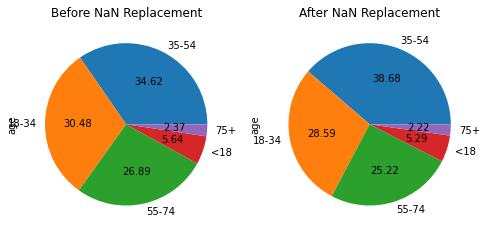

In [40]:
df['age'] = df.age.str.replace(' ','').replace('Under18','<18').replace('75orolder','75+')
temp = df.age

fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.age.fillna(df.age.mode().iloc[0], inplace=True)
df.age.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")


df['age_factor'] = df.age.map({'<18':0,'18-34':1,'35-54':2,'55-74':3,'75+':4})

**FIlling with mode increases the 35-54 range by 4% which Im not sure is good. Since we rank these, we could use random choice to fill in the rank later.**

**Annual Income**

Ranking 0 through 4 based on income status.

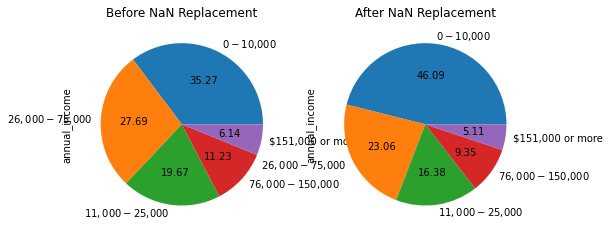

In [41]:
temp = df.annual_income

fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.annual_income.fillna(df.annual_income.mode().iloc[0], inplace=True)
df.annual_income.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['annual_income_factor'] = df.annual_income.map({'$0 - $10,000':0, '$11,000 - $25,000':1, 
                                                   '$26,000 - $75,000':2, '$76,000 - $150,000':3,
                                                   '$151,000 or more':4, })

**There is a sharp shift using the mode in this case for values of 0-10,000, so perhaps random choice is good here too.**

**Took Placement Test**

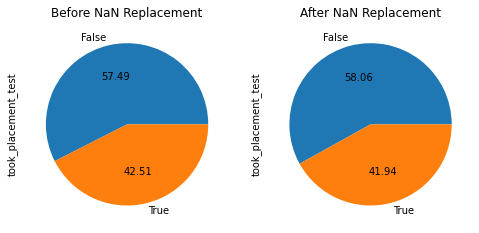

In [42]:
temp = df.took_placement_test
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.took_placement_test.fillna(df.took_placement_test.mode().iloc[0], inplace=True)
df.took_placement_test.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['took_placement_test'] = df.took_placement_test.map({False:0,True:1})



**Future Contact**

Making binary.

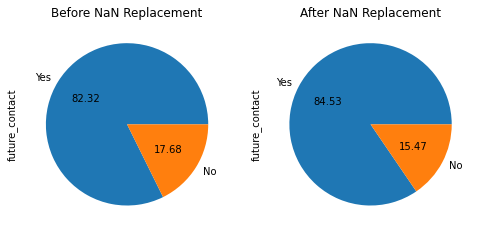

In [43]:
temp = df.future_contact
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.future_contact.fillna(df.future_contact.mode().iloc[0], inplace=True)
df.future_contact.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['future_contact_yes'] = df.future_contact.map({'No':0,'Yes':1})



**Purchased Subscription**

Were not going to use this variable as its highly correlated with the other subscription variable.

Text(0.5, 1.0, 'After NaN Replacement')

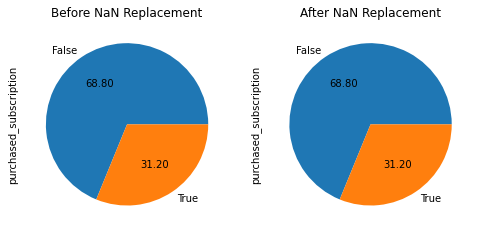

In [186]:
temp = df.purchased_subscription
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.purchased_subscription.fillna(df.purchased_subscription.mode().iloc[0], inplace=True)
df.purchased_subscription.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

# df['purchased_subscription_factor'] = df.purchased_subscription.map({False:0,True:1})


In [181]:
# df[['purchased_subscription','langapp_subscriber']].corr()

**Gender**

Remapping gender to have three options rather than 4 for ease of examination since the value counts are so low.

Text(0.5, 1.0, 'After NaN Replacement')

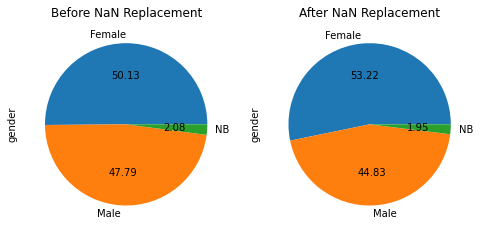

In [46]:
## remapping the low counts all to other
df['gender'] = df.gender.str.replace('Prefer not to say','NB').replace('Other','NB')

temp = df.gender
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.gender.fillna(df.gender.mode().iloc[0], inplace=True)
df.gender.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

In [47]:
genders = pd.get_dummies(df.gender, prefix='gender_')
genders.head()
# genders.columns = ['gender_'+c for c in ['female','male','nb']]

,gender__Female,gender__Male,gender__NB
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


**Employement Status**

- Creating an employment status factor ranking from Unemployed=0 to Parttime=1, Fulltime=2, and retired = -1.
- This might be a skewed ranking but I would like to include this so lets give retired a hard skew opposite.

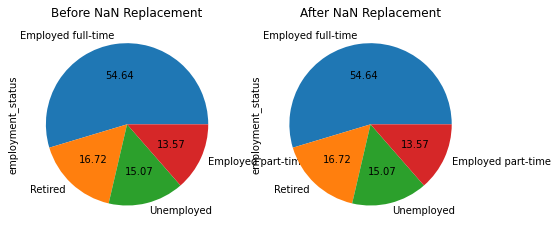

In [182]:
temp = df.employment_status
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.employment_status.fillna(df.employment_status.mode().iloc[0], inplace=True)
df.employment_status.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['emp_status_factor'] = df.employment_status.map({'Employed full-time':3,'Employed part-time':2,
                                                    'Retired':1,'Unemployed':0})

# emp_stats = pd.get_dummies(df.employment_status)
# emp_stats.columns = ['emp_status_'+ c for c in ['fulltime','parttime','retired','unemployed']]

**LangApp Platforms**

Remapping to make this as either Mobile or Not.

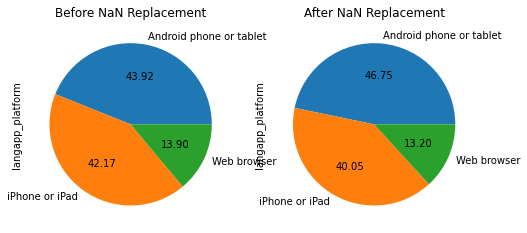

In [49]:
temp = df.langapp_platform

fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.langapp_platform.fillna(df.langapp_platform.mode().iloc[0], inplace=True)
df.langapp_platform.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['platform_is_mobile'] = df.langapp_platform.map({'Android phone or tablet':1,
                                                            'iPhone or iPad':1,
                                                            'Web browser':0})

# platforms = pd.get_dummies(df.langapp_platform)
# platforms.columns = ['platform_'+c for c in ['android','web','apple']]

In [50]:
df.langapp_platform.unique()

array(['Android phone or tablet', 'iPhone or iPad', 'Web browser'],
      dtype=object)

In [51]:
df.platform_is_mobile.value_counts()

1    5431
0     826
Name: platform_is_mobile, dtype: int64

**Student Status**

Remapping Students Status to Fulltime=2, Partime=1, Not a student=0.

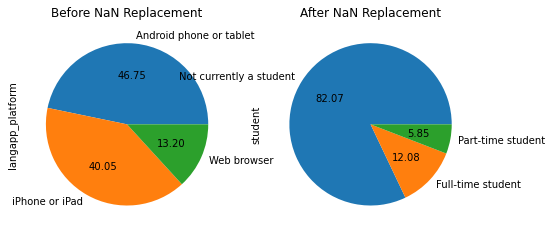

In [52]:
### temp = df.student
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.student.fillna(df.student.mode().iloc[0], inplace=True)
df.student.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['stud_factor'] = df.student.map({'Full-time student':2, 'Part-time student':1, 
                                    'Not currently a student':0})

# students = pd.get_dummies(df.student)
# students.columns = ['stud_status_'+c for c in ['fulltime','notastudent','parttime']]

In [53]:
df.stud_factor.value_counts()

0    5135
2     756
1     366
Name: stud_factor, dtype: int64

**Primary Langauge Review**

Remapping to a binary on YES this is a review for the subscriber.

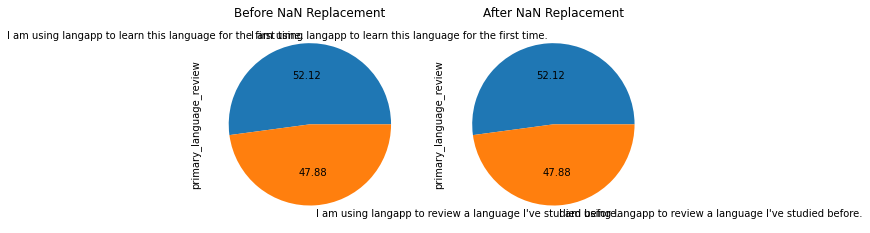

In [183]:
temp = df.primary_language_review

fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.primary_language_review.fillna(df.primary_language_review.mode().iloc[0], inplace=True)
df.primary_language_review.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['prim_lang_review_yes'] = 0
df['prim_lang_review_yes'] = 1*(df.primary_language_review == "I am using Duolingo to review a language I've studied before.")

# prim_lang = pd.get_dummies(df.primary_language_review)
# prim_lang.columns = ['primary_lang_'+c for c in ['review','firsttime']]

**Subscription**

In [184]:
df.langapp_subscriber.unique()
df.langapp_subscriber.value_counts()

No, I have never paid for langapp Plus             4262
Yes, I currently pay for langapp Plus              1628
I don't know if I pay for langapp Plus              213
No, but I have previously paid for langapp Plus     154
Name: langapp_subscriber, dtype: int64

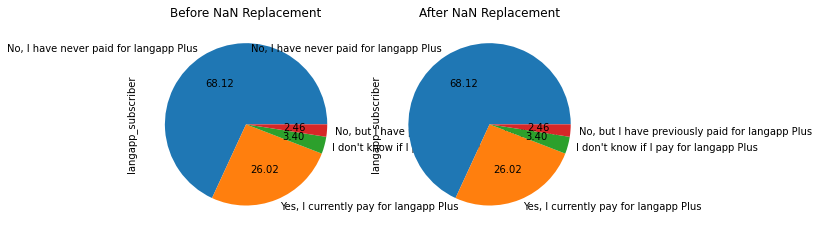

In [187]:
temp = df.langapp_subscriber

fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.langapp_subscriber.fillna(df.langapp_subscriber.mode().iloc[0], inplace=True)
df.langapp_subscriber.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['subscriber_factor'] = df.langapp_subscriber.map({'No, I have never paid for langapp Plus':0,
                                                      'Yes, I currently pay for langapp Plus':1,
                                                      "I don't know if I pay for langapp Plus":0,
                                                      'No, but I have previously paid for langapp Plus':-1})
## mapping I dont know to 0 because there are few and previously paid as -1 because we lost them


subscribe = pd.get_dummies(df.langapp_subscriber)
subscribe.columns = ['subscriber_'+c for c in ['dont_know','never_paid','paid_before','currently_pay']]

**LANGAPP Usage**

Remapping Usage to an increasing rank on amount of use.

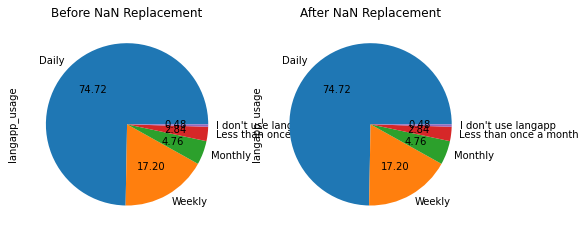

In [188]:
temp = df.langapp_usage

fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df.langapp_usage.fillna(df.langapp_usage.mode().iloc[0], inplace=True)
df.langapp_usage.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

## do we want to put a weight on usage, where a more frequent use is better?
df['usage_factor'] = df.langapp_usage.map({'Daily':4, 'Weekly':3, 
                                           'Monthly':2, 
                                           'Less than once a month':1,
                                           "I don't use Duolingo":0})

usage = pd.get_dummies(df.langapp_usage)
usage.columns = ['usage_'+c for c in ['daily','dont_use','less_than_month','monthly','weekly']]

In [189]:
usage_map = pd.DataFrame(df.langapp_usage.value_counts())
# usage_map['map'] = df.usage_factor.value_counts().index
usage_map

,langapp_usage
Daily,4675
Weekly,1076
Monthly,298
Less than once a month,178
I don't use langapp,30


**Primary Language Commitment**

Remapping Primary Language Commitment Level to an increasing scale.

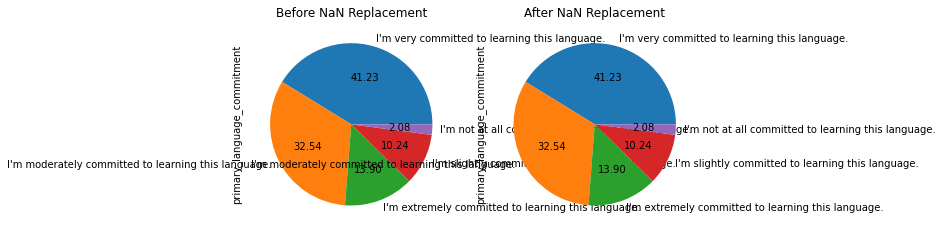

In [190]:
temp = df.primary_language_commitment
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.primary_language_commitment.fillna(df.primary_language_commitment.mode().iloc[0], inplace=True)
df.primary_language_commitment.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['primary_language_commitment_factor'] = df.primary_language_commitment.map({
           "I'm very committed to learning this language.":3,
           "I'm slightly committed to learning this language.":1,
           "I'm moderately committed to learning this language.":2,
           "I'm extremely committed to learning this language.":4,
           "I'm not at all committed to learning this language.":0})

# lang_commit = pd.get_dummies(df.primary_language_commitment)
# lang_commit.columns = ['lang_commit_'+c for c in ['extremely','moderately','not_at_all','slightly','very']]


**Language Proficiency**

Remapping Language Proficiency to an increasing scale.

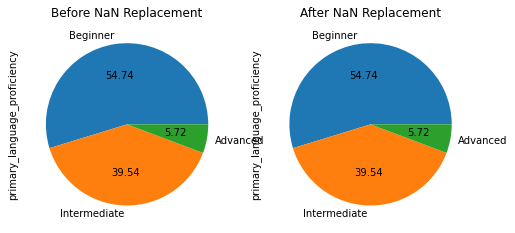

In [191]:
temp = df.primary_language_proficiency
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")
df.primary_language_proficiency.fillna(df.primary_language_proficiency.mode().iloc[0], inplace=True)
df.primary_language_proficiency.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")

df['lang_prof_factor'] = df.primary_language_proficiency.map({'Beginner':0,'Intermediate':1,'Advanced':2})

# lang_prof = pd.get_dummies(df.primary_language_proficiency)
# lang_prof.columns = ['lang_prof_'+c for c in ['beginner','intermediate','advanced']]

In [61]:
df.lang_prof_factor.value_counts()

0    3425
1    2474
2     358
Name: lang_prof_factor, dtype: int64

**Country**

This was a unique situation where we could potentially use dummies but for this instance, I felt a weighted version of the variable to be more useful, based on the amount of instances within the data.

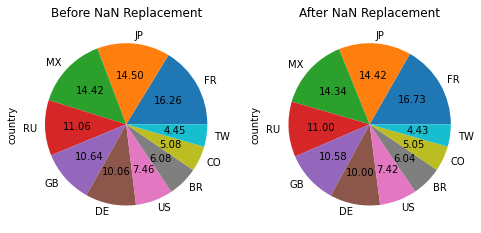

In [62]:
temp = df.country
fig, ax=plt.subplots(1,2,figsize=(8,4))
temp.value_counts().plot(kind='pie',ax=ax[0], autopct='%.2f');
ax[0].set_title("Before NaN Replacement")

df['country_weight'] = df.country.map((df.country.value_counts()/len(df)).to_dict())
df['country_weight'].fillna(0,inplace=True)

df.country.fillna(df.country.mode().iloc[0], inplace=True)
df.country.value_counts().plot(kind='pie',ax=ax[1], autopct='%.2f');
ax[1].set_title("After NaN Replacement")



country = pd.get_dummies(df.country)
country.columns = ['country_'+c for c in list(country.columns.get_level_values(0))]

In [63]:
# df.country_weight.value_counts(dropna=False)

In [64]:
cw_df = pd.DataFrame(df.country.value_counts())
# cw_df['Weights'] = df.country_weight.value_counts().index
cw_df

,country
FR,1047
JP,902
MX,897
RU,688
GB,662
DE,626
US,464
BR,378
CO,316
TW,277


**Primary Language Motivation**

Primary Language Motivation was mapped and weighted in similar fashion to countries.

In [65]:
# df['plmotiv_weight'] = df.primary_language_motivation.map((df.primary_language_motivation.value_counts()/len(df)).to_dict())
# df['plmotiv_weight'].fillna(0,inplace=True)


df.primary_language_motivation.fillna(df.primary_language_motivation.mode().iloc[0], inplace=True)
df['plmotiv_weight'] = df.primary_language_motivation.map((df.primary_language_motivation.value_counts()/len(df)).to_dict())
## no sense in plotting this out with the labels and its low fill percentage
motivation = pd.get_dummies(df.primary_language_motivation)
motivation.columns = ['motivation_'+c for c in ['interest_in_culture','trip','review','like_new_languages',
                                                'speak_to_locals','school','family','advancement','challenge_self',
                                                'heritage','relationships','brain_health','productivity']]



In [66]:
df.plmotiv_weight.value_counts().index

Float64Index([ 0.17500399552501197,  0.11938628735815886,  0.11427201534281604,
               0.11379255234137765,  0.10244526130733578,   0.0799105002397315,
               0.07287837621863513,  0.06472750519418252, 0.052421288157263865,
               0.04522934313568803, 0.026210644078631933,  0.02445261307335784,
              0.009269618027808854],
             dtype='float64')

In [67]:
plm_df = pd.DataFrame(df.primary_language_motivation.value_counts())
plm_df['Weights'] = df.plmotiv_weight.value_counts().index
plm_df

,primary_language_motivation,Weights
I need to be able to speak the local language where I live,1095,0.175004
I want to use my time more productively,747,0.119386
I am preparing for a trip,715,0.114272
I want to keep my brain healthy,712,0.113793
I want to connect with my heritage or identity,641,0.102445
I want to improve relationships with some of the people in my life,500,0.079911
I like to learn new languages,456,0.072878
I want my family to learn a language together,405,0.064728
I am interested in a culture that speaks this language,328,0.052421
I want to advance professionally or economically,283,0.045229


**Fix the start date column and expand it.**

In [68]:
df['langapp_start_date'] = pd.to_datetime(df.langapp_start_date)
df['app_sd_mon'] = df.langapp_start_date.dt.month
df['app_sd_day'] = df.langapp_start_date.dt.day
df['app_sd_dow'] = df.langapp_start_date.dt.dayofweek
df['app_sd_year'] = df.langapp_start_date.dt.year

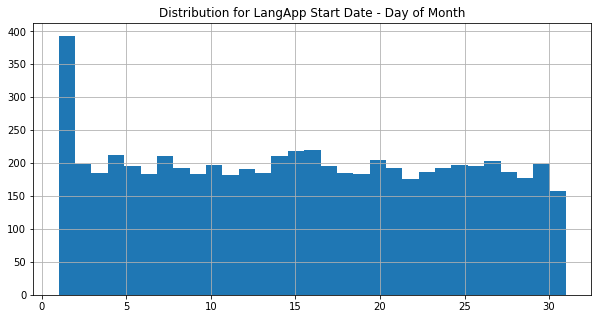

In [69]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
df.app_sd_day.hist(ax=ax, bins=31);
plt.title("Distribution for LangApp Start Date - Day of Month");

It looks like users usually start on the first of the month.

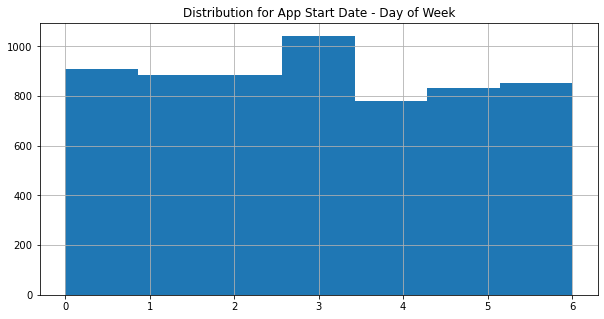

In [70]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
df.app_sd_dow.hist(ax=ax, bins=7);
plt.title("Distribution for App Start Date - Day of Week");

It looks like starting on the first of the month is more important that whatever day of the week it is.

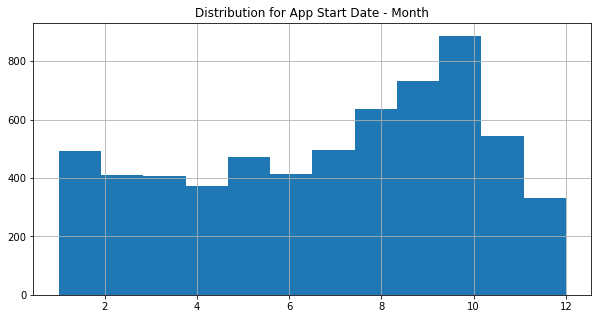

In [71]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
df.app_sd_mon.hist(ax=ax, bins=12);
plt.title("Distribution for App Start Date - Month");

**For this set of users, many of their start months were in the beginning of the Fall, this could fall in inline with school and as a potential bump to courses there.**

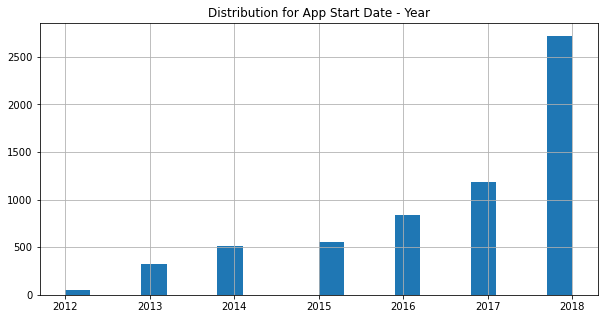

In [72]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
df.app_sd_year.hist(ax=ax, bins=20);
plt.title("Distribution for App Start Date - Year");

This is showing that there was a significant spike in start dates in 2018.

Lets sort the data by date and group it and examine some of the numerical features.

In [73]:
dft = df.sort_values(by='langapp_start_date')

In [74]:
# ?? pd.offsets.MonthBegin

In [75]:
dft_sum = dft.groupby(dft.langapp_start_date.dt.round('D')).sum()
dft_sum.head(3)

,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,survey_complete,time_spent_seconds,age_factor,annual_income_factor,future_contact_yes,emp_status_factor,platform_is_mobile,stud_factor,prim_lang_review_yes,subscriber_factor,usage_factor,primary_language_commitment_factor,lang_prof_factor,country_weight,plmotiv_weight,app_sd_mon,app_sd_day,app_sd_dow,app_sd_year
langapp_start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-07,0.0,36.0,1,1,130.0,20.0,50.0,42.0,2.0,2402.0,1.0,519.0,2,2,1,2,1,0,0,1,4.0,3,0,0.109957,0.045229,4.0,7.0,5.0,2012.0
2012-04-10,50.0,64.0,0,1,210.0,89.0,296.0,292.0,246.0,2400.0,1.0,143.0,1,4,1,3,1,0,0,1,4.0,4,2,0.144159,0.113793,4.0,9.0,0.0,2012.0
2012-04-20,0.0,27.0,0,1,101.0,94.0,99.0,93.0,421.0,2389.0,1.0,575.0,1,2,1,3,0,0,0,1,4.0,3,1,0.161739,0.114272,4.0,20.0,4.0,2012.0


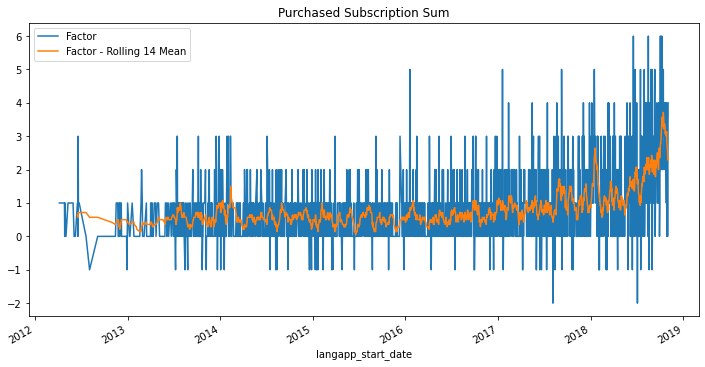

In [76]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
dft_sum.subscriber_factor.plot(ax=ax)
dft_sum.subscriber_factor.rolling(14).mean().plot(ax=ax)
ax.legend(['Factor','Factor - Rolling 14 Mean'])
plt.title("Purchased Subscription Sum");

**This coincides with the duolingo start date years and as 2018 rolled on, the sum of purchased subscriptions went up.**
- I chose a rolling factor of 14 arbitrarily to better see any trend.

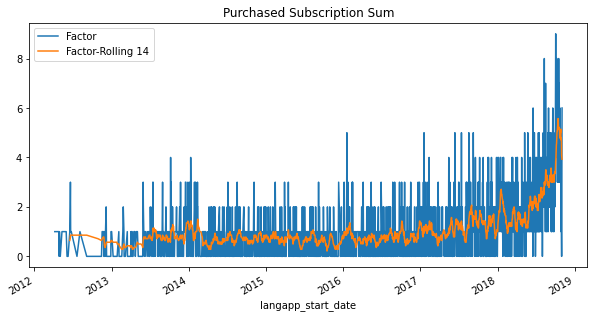

In [77]:
tmp = df.copy()
tmp['purchased_subscription_factor'] = tmp.purchased_subscription.map({False:0,True:1})
tmp = tmp.groupby(tmp.langapp_start_date.dt.round('D')).sum()
fig, ax=plt.subplots(1,1,figsize=(10,5))
tmp.purchased_subscription_factor.plot(ax=ax)
tmp.purchased_subscription_factor.rolling(14).mean().plot(ax=ax)
ax.legend(['Factor','Factor-Rolling 14'])
plt.title("Purchased Subscription Sum");

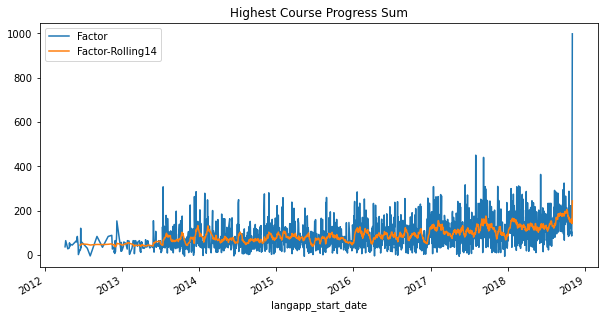

In [78]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
dft_sum.highest_course_progress.plot(ax=ax)
dft_sum.highest_course_progress.rolling(14).mean().plot(ax=ax)
ax.legend(['Factor','Factor-Rolling14'])
plt.title("Highest Course Progress Sum");

**It seems more users joined the course as progress increased although perhaps not as strong of a trend.**

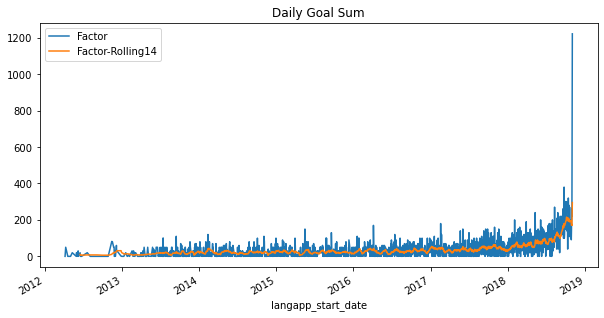

In [79]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
dft_sum.daily_goal.plot(ax=ax)
dft_sum.daily_goal.rolling(14).mean().plot(ax=ax)
ax.legend(['Factor','Factor-Rolling14'])
plt.title("Daily Goal Sum");

**This shows the daily goal sum also increased in that time which might suggest more ususe engagement!**

In [80]:
dft_avg = dft.groupby(dft.langapp_start_date.dt.round('D')).mean()
# dft_avg.head(3)

### Join the Dummied Features
<a class="anchor" id="join"></a>
[Return to TOC](#toc)

As the analysis went on, there were certain items that were obvious to aggregate or change such as employment, platforms, student status all becoming factored features rather than dummied, infact it ended up being that only Gender was the dummied variable mostly because I felt it should be accounted for in a different way.

In [81]:
df = pd.concat([df, genders, country, motivation], axis=1, join='inner')
                #emp_stats, platforms, students, prim_lang,
                #subscribe, usage, #lang_commit, lang_prof, 
#               

df.shape

(6257, 73)

**Retouching on Missing Values**

In [82]:
missing_vals = df.isnull().sum()/len(df) * 100
missing_vals[missing_vals > 0]

langapp_start_date                       1.134729
daily_goal                              56.864312
highest_course_progress                  1.358479
highest_crown_count                      5.833467
n_active_days                            1.134729
n_lessons_started                        3.659901
n_lessons_completed                      3.659901
longest_streak                           1.134729
n_days_on_platform                       1.134729
other_resources                         28.128496
primary_language_motivation_followup    40.258910
survey_complete                          0.559374
time_spent_seconds                       0.559374
usage_factor                             0.479463
app_sd_mon                               1.134729
app_sd_day                               1.134729
app_sd_dow                               1.134729
app_sd_year                              1.134729
dtype: float64

**For most of these items we can simply fill with the median value.**

- However for **other_resources**, **primary_language_motivation_followup**, and **daily_goal**, we will try and be more specific.
- Dropping took_placement_test altogether.

In [83]:
df = df.drop('took_placement_test', axis=1)

In [84]:
print("Fill NaN Values on Numeric Vars with Median...")
for c in missing_vals[(missing_vals>0) & (missing_vals<6)].index:
    df[c].fillna(df[c].median(),inplace=True)

Fill NaN Values on Numeric Vars with Median...


In [85]:
missing_vals = df.isnull().sum()/len(df) * 100
missing_vals[missing_vals > 0]

daily_goal                              56.864312
other_resources                         28.128496
primary_language_motivation_followup    40.258910
dtype: float64

### There are some odd values in **time_spent_seconds** and **highest_course_progress**.

**Time Spent on Survey**

In [86]:
df[['time_spent_seconds','highest_course_progress']].describe()

,time_spent_seconds,highest_course_progress
count,6257.000000,6257.000000
mean,3292.421608,27.284961
std,26123.356035,20.023080
min,-297.000000,-10.000000
25%,235.000000,10.000000
50%,325.000000,26.000000
75%,468.000000,38.000000
max,584939.000000,83.000000


In [87]:
len(df[df.time_spent_seconds < 0])

93

- There are ~90 instances where the time spent on the survey is less than 0 seconds, which doesnt make much sense.
- We change these to the median time spent.

In [88]:
temp = df.time_spent_seconds
temp[temp < 0] = df.time_spent_seconds.median()
df['time_spent_seconds'] = temp

df.time_spent_seconds.describe()

C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count      6257.000000
mean       3300.291514
std       26122.379824
min           2.000000
25%         240.000000
50%         325.000000
75%         468.000000
max      584939.000000
Name: time_spent_seconds, dtype: float64

**Highest Course Progress**

In [89]:
len(df[df.highest_course_progress < 0])

92

- There are ~90 instances where the highest course progress is also less than 0.
- We change these to the median course progress.

In [90]:
temp = df.highest_course_progress
temp[temp < 0] = df.highest_course_progress.median()
df['highest_course_progress'] = temp

df.highest_course_progress.describe()

C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    6257.000000
mean       27.753077
std        19.608702
min         1.000000
25%        11.000000
50%        26.000000
75%        38.000000
max        83.000000
Name: highest_course_progress, dtype: float64

**Daily Goal**

- Rather than filling the missing values with the median or mean we know from using the app that you dont necessarily set your daily goal which could be where the NaN are stemming from. 
- With this in mind we will set the NaN to 0 assuming they never set a daily goal.
- The normal daily goal settings are usually 10, 20, 30, 50. With this in mind we will also correct the ones that have off values with their next closest value, ie. 325 -> 50 because 50 is the max, 27 -> 30, 1 -> 0, etc.

In [91]:
df.daily_goal.value_counts()

20.0    1049
30.0     587
50.0     526
10.0     479
1.0       55
16.0       2
32.0       1
Name: daily_goal, dtype: int64

In [92]:
df.daily_goal.fillna(0, inplace=True)

temp = df.daily_goal
temp[temp == 325] = 50
temp[temp == 27] = 30
temp[temp == 1] = 0
temp[temp == 16] = 20
temp[temp == 32] = 30

df['daily_goal'] = temp

df.daily_goal.value_counts()

C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_l

0.0     3613
20.0    1051
30.0     588
50.0     526
10.0     479
Name: daily_goal, dtype: int64

In [93]:
df.daily_goal.describe()

count    6257.000000
mean       11.147515
std        15.663914
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        50.000000
Name: daily_goal, dtype: float64

### Cleaning Up to Numerical Values

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257 entries, 0 to 6256
Data columns (total 72 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   user_id                               6257 non-null   object        
 1   langapp_start_date                    6257 non-null   datetime64[ns]
 2   daily_goal                            6257 non-null   float64       
 3   highest_course_progress               6257 non-null   float64       
 4   purchased_subscription                6257 non-null   bool          
 5   highest_crown_count                   6257 non-null   float64       
 6   n_active_days                         6257 non-null   float64       
 7   n_lessons_started                     6257 non-null   float64       
 8   n_lessons_completed                   6257 non-null   float64       
 9   longest_streak                        6257 non-null   float64       
 10  

In [95]:
dfn = df.set_index('user_id').select_dtypes(exclude=['object','datetime']).reset_index()
print(df.shape, dfn.shape)

(6257, 72) (6257, 55)


**From here I plan to group by user id and take the mean for each resulting in single user ids and helping to eliminate confusion. My thinking is this, these user id's need to be unique, so either the wrong id was attached to the data (which we have no way of confirming) or the user id ended up being re-used between individuals (which could be but then still how do we confirm what is what outside of the most recent survey date) or its the same individual at different points in their life. I am taking the third option.**

In [96]:
dfg = dfn.groupby('user_id').mean()
print(dfg.shape, dfn.shape)

(6185, 54) (6257, 55)


In [97]:
dfg.head()

,daily_goal,highest_course_progress,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,survey_complete,time_spent_seconds,age_factor,annual_income_factor,future_contact_yes,emp_status_factor,platform_is_mobile,stud_factor,prim_lang_review_yes,subscriber_factor,usage_factor,primary_language_commitment_factor,lang_prof_factor,country_weight,plmotiv_weight,app_sd_mon,app_sd_day,app_sd_dow,app_sd_year,gender__Female,gender__Male,gender__NB,country_BR,country_CO,country_DE,country_FR,country_GB,country_JP,country_MX,country_RU,country_TW,country_US,motivation_interest_in_culture,motivation_trip,motivation_review,motivation_like_new_languages,motivation_speak_to_locals,motivation_school,motivation_family,motivation_advancement,motivation_challenge_self,motivation_heritage,motivation_relationships,motivation_brain_health,motivation_productivity
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35c9fc6e72c911e99681dca9049399ef,0.0,58.0,0.0,275.0,91.0,232.0,232.0,589.0,849.0,1.0,193.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,4.0,3.0,2.0,0.144159,0.072878,7.0,8.0,4.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35c9fdde72c911e98630dca9049399ef,20.0,4.0,0.0,22.0,54.0,90.0,88.0,27.0,125.0,1.0,139.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.144159,0.175004,7.0,2.0,0.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35c9feb072c911e9ab4cdca9049399ef,0.0,11.0,1.0,17.0,30.0,49.0,47.0,30.0,479.0,1.0,119.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,2.0,0.0,0.144159,0.102445,7.0,13.0,3.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35c9ff7072c911e9900ddca9049399ef,20.0,11.0,1.0,55.0,93.0,1161.0,1028.0,40.0,117.0,1.0,229.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,-1.0,4.0,3.0,1.0,0.144159,0.114272,7.0,10.0,1.0,2018.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35ca002672c911e99effdca9049399ef,0.0,64.0,1.0,417.0,85.0,215.0,252.0,266.0,1951.0,1.0,157.0,2.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,3.0,1.0,0.144159,0.102445,7.0,2.0,1.0,2013.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [98]:
dfg.isnull().sum().sum()

0

In [99]:
gc.collect()

18127

### Examining Correlations Amongst the Variables
<a class="anchor" id="corrs"></a>
[Return to TOC](#toc)

In [100]:
from scipy import stats
def pearson_corrs(x):
    ''' -function for getting pearson corrs and pvals  
        -pass a data frame '''
    pvals = np.zeros(x.corr().shape)
    corrs = np.zeros(x.corr().shape)
    for i, c in enumerate(x.columns):
        for j, c1 in enumerate(x.columns):          
            temp = x[[c,c1]].dropna()
            corr, pval = stats.pearsonr(x=temp.iloc[:,0], y=temp.iloc[:,1])
            pvals[i,j] = pval
            corrs[i,j] = corr
    pvals = pd.DataFrame(pvals, columns = x.columns, index = x.columns)
    corrs = pd.DataFrame(corrs, columns = x.columns, index = x.columns)
    return corrs, pvals

In [101]:
dfg.shape

(6185, 54)

In [102]:
corrs, pvals = pearson_corrs(dfg.select_dtypes(exclude=['object','datetime','bool','uint8']))

C:\Users\bills\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [158]:
demographic = ['age_factor', 'annual_income_factor',
               'future_contact_factor', 
               'emp_status_factor', 'stud_factor', 'subscriber_factor', 'usage_factor',
               'primary_language_commitment_factor', 'lang_factor','gender_female',
               'gender_male', 'gender_other', 'country_weight']

langapp_use = ['langapp_usage','langapp_platform','primary_language_commitment_factor',
           'lang_prof_factor','platform_is_mobile','plmotiv_weight',
           'primary_lang_firsttime']

activity = ['daily_goal', 'highest_course_progress','highest_crown_count',\
            'n_active_days','n_lessons_started',
            'longest_streak','n_days_on_platform','app_sd_mon',
            'app_sd_day', 'app_sd_dow', 'app_sd_year',]

survey_info = ['survey_complete','time_spent_seconds',]

In [104]:
corrs2 = corrs[(np.abs(corrs) > 0.2)] ## abs(correlations) > 0.2
cols_to_keep = []
for c in corrs2.columns:
    if corrs2[c].sum() != 1: ##drop cols if the only value is its correlation with itself
        cols_to_keep.append(c)

In [105]:
# corrs2
# corrs2.sum(axis=1)
# cols_to_keep

In [106]:
# df.purchased_subscription_factor.value_counts()

In [107]:
# df.subscriber_factor.value_counts()

In [108]:
## already saved these down and they take too long to create

# fig, ax=plt.subplots(1,1,figsize=(18,18))
# # sns.heatmap(corrs[cols_to_keep].loc[cols_to_keep], ax=ax, cmap='coolwarm', fmt='.1f', annot=True);
# sns.heatmap(corrs, ax=ax, cmap='coolwarm', fmt='.1f', annot=True);
# plt.title("Correlation Heat Map for");
# plt.tight_layout()
# plt.savefig('correlation_heat_map.png');

**We have some strong correlations in the upper left.**

In [109]:
# fig, ax=plt.subplots(1,1,figsize=(18,18))
# sns.heatmap(pvals, ax=ax, cmap='RdYlGn_r', fmt='.2f', annot=True);
# plt.title("Statistical Significance (p-val) for the Correlations Above");
# plt.tight_layout()
# plt.savefig('pval_heat_map.png');

The plots above reflect instances within the correlation matrix where there was at least one correlation whose absolute value was greater than 0.2. This helps to narrow down significant items for an easier visual. The secondary chart relfects the p-value significance associated with the pearson correlations to make sure they are actually useful. If the second chart shows dark green in the same location as the heat map above, then it has a low p-value which corresponds to high significance.

- There are positive and signifcant correlations within:
    - course progress
    - active days
    - lessons started
    - lessons completed
    - active days 
    - crown count
- These make sense because these would all push one another in the same direction.
- There is a positive and significant correlation for age factor with this as well meaning the higher the age factor the more general progress is made. 
- There also correlation for a subscriber and course progress.

- There are positive and significant correlations within age, income and subscriber as well.

- Active users are more likely to buy a subscription and generally to use it.

- There is definitely something to be said about subscribers and how much effort they put in.

In [110]:
# fig, ax=plt.subplots(1,1,figsize=(10,10))
# sns.heatmap(df[demographic].corr(), ax=ax, cmap='coolwarm', fmt='.1f', annot=True);
# plt.title("Correlation Heat Map for Demographics");

In [111]:
# fig, ax=plt.subplots(1,1,figsize=(10,10))
# sns.heatmap(df[duo_use].corr(), ax=ax, cmap='coolwarm', fmt='.1f', annot=True);
# plt.title("Correlation Heat Map for Duolingo Use");

In [112]:
# fig, ax=plt.subplots(1,1,figsize=(10,10))
# sns.heatmap(df[activity].corr(), ax=ax, cmap='coolwarm', fmt='.1f', annot=True);
# plt.title("Correlation Heat Map for Duolingo Use");

### Other plots of demographics combined...
<a class="anchor" id="other_plots"></a>
[Return to TOC](#toc)

In [113]:
df.age.value_counts()

35-54    2420
18-34    1789
55-74    1578
<18       331
75+       139
Name: age, dtype: int64

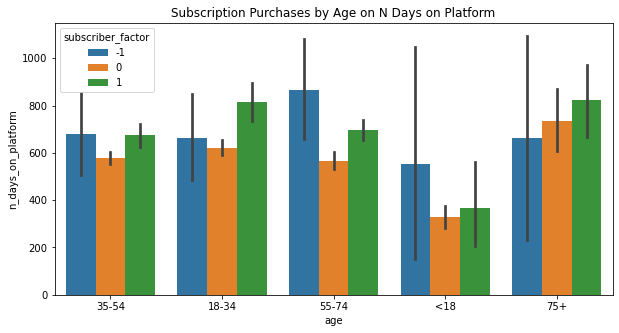

In [114]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='age',y='n_days_on_platform',hue='subscriber_factor',data=df,ax=ax);
plt.title("Subscription Purchases by Age on N Days on Platform");
# ax.set_xticks(['<18','18-34','35-54','55-74','75+']);

- Subscribers spend more days on the platform over never subscribers regardless of age. This includes the subscribers (1) and the "I have previously paid for it" (-1).

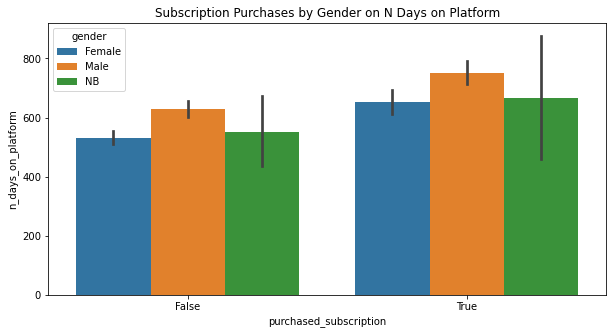

In [115]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='purchased_subscription',y='n_days_on_platform',hue='gender',data=df,ax=ax);
plt.title("Subscription Purchases by Gender on N Days on Platform");

- Males tend to subscribe more in general.

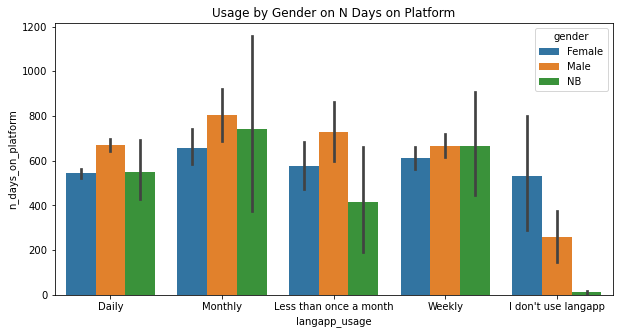

In [116]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='langapp_usage',y='n_days_on_platform',hue='gender',data=df,ax=ax);
plt.title("Usage by Gender on N Days on Platform");

- Many users use this monthly and weekly.

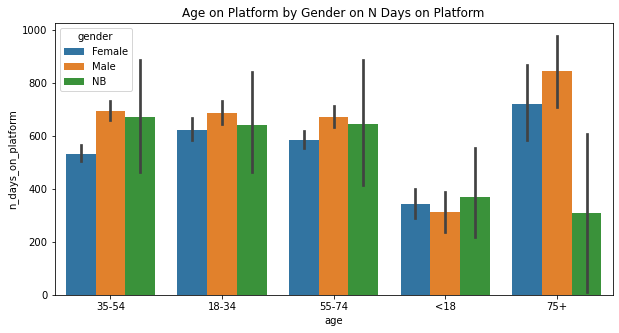

In [117]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='age',y='n_days_on_platform',hue='gender',data=df,ax=ax);
plt.title("Age on Platform by Gender on N Days on Platform");

- Most users seem to be older than 18 so perhaps that spike in the fall with useage is for college students?

In [118]:
# df.columns

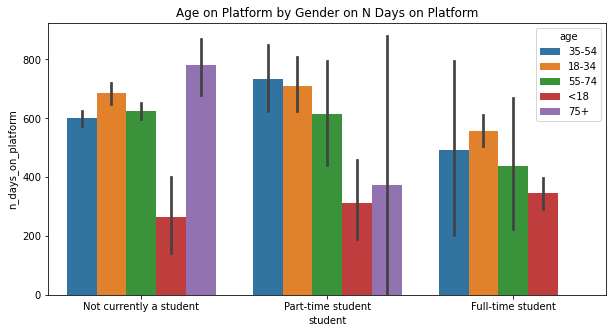

In [119]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='student',y='n_days_on_platform',hue='age',data=df,ax=ax);
plt.title("Age on Platform by Gender on N Days on Platform");

- The ages align for student status.

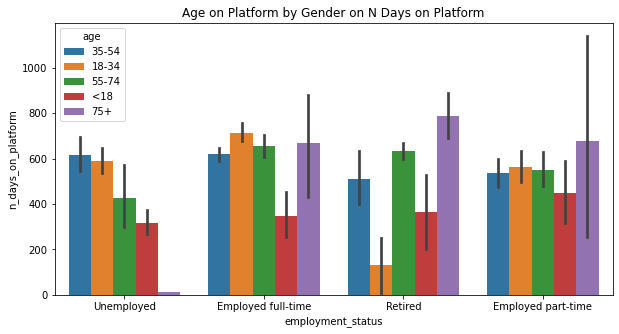

In [120]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='employment_status',y='n_days_on_platform',hue='age',data=df,ax=ax);
plt.title("Age on Platform by Gender on N Days on Platform");

- Employment appears associated with more days on the platform regardless of Full or Part time.

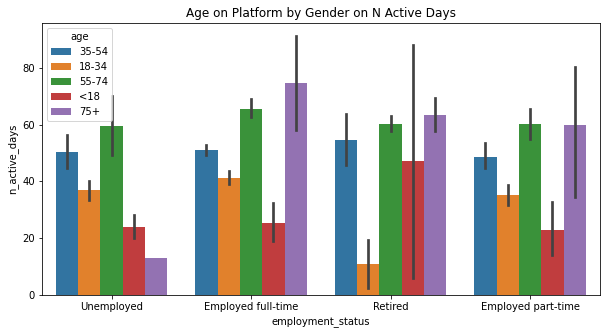

In [121]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='employment_status',y='n_active_days',hue='age',data=df,ax=ax);
plt.title("Age on Platform by Gender on N Active Days");

- For the 55-74 age group, employment has no effect on activate days...which kinda of makes sense because they are more likely (I think) to be employed or retired to some degree.

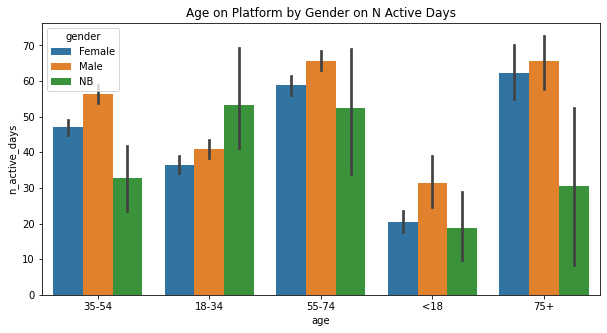

In [122]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='age',y='n_active_days',hue='gender',data=df,ax=ax);
plt.title("Age on Platform by Gender on N Active Days");

- 55+ ages are dominating in active days.

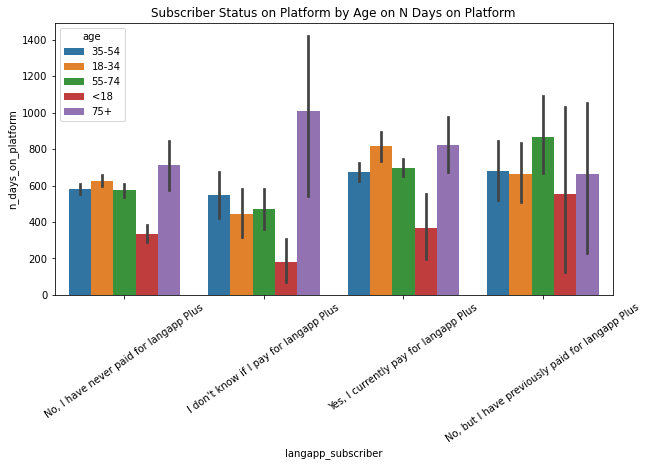

In [123]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
g = sns.barplot(x='langapp_subscriber',y='n_days_on_platform',hue='age',data=df,ax=ax);
for item in g.get_xticklabels():
    item.set_rotation(35)
plt.title("Subscriber Status on Platform by Age on N Days on Platform");

I dont understand how you are not sure if you pay for something or not...

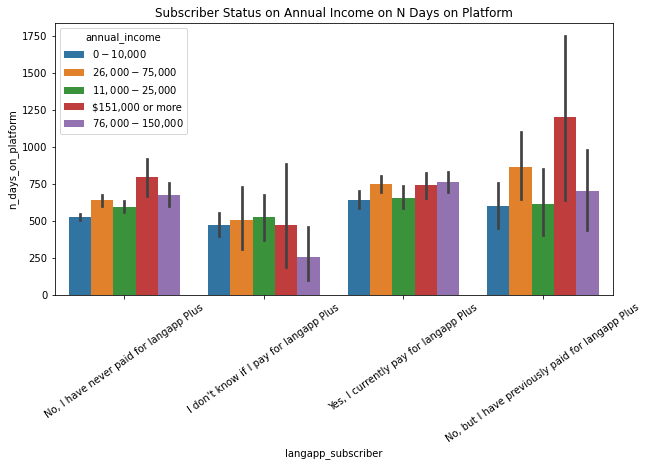

In [124]:
fig, ax=plt.subplots(1,1,figsize=(10,5))
g = sns.barplot(x='langapp_subscriber',y='n_days_on_platform',hue='annual_income',data=df,ax=ax);
for item in g.get_xticklabels():
    item.set_rotation(35)
plt.title("Subscriber Status on Annual Income on N Days on Platform");

- The 151k and up group has significantly more days on the platform and has also previously paid for it.

### Multiple Value / Text Features
<a class="anchor" id="text_feats"></a>
[Return to TOC](#toc)

Since there is more going on in these features, we will need to transform them in a different way.

- Other Resources
- Primary Language Motivation Follow Up

In [125]:
import re
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()

**Focusing on these cols**

In [126]:
cols = ['other_resources', 'primary_language_motivation_followup']

**OTHER RESOURCES**

We can split out the responses in the Other Resources and create a count of other resources listed. 
- Expand text using string and regex methods.
- Expand with Tfidf Vectorizer.
- Count out words.

In [127]:
def text_to_words(raw_text):
    '''this is a one text at a time cleaning function'''
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text) 
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    # 3. Remove Stopwords. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]  #returns a list 
    # 5. Stem words. Need to define porter stemmer above
    singles = [stemmer.stem(word) for word in meaningful_words]
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( singles ))  

In [128]:
df.other_resources.fillna('none').head(10)

0                                      Movies/TV Shows
1    Speak with others (language events, conversati...
2                            Textbooks,Movies/TV Shows
3                                                 none
4                           Other apps,Movies/TV Shows
5                      Textbooks,Online language class
6    Speak with others (language events, conversati...
7                                                 none
8                    Other apps,Other (please specify)
9                                        Private tutor
Name: other_resources, dtype: object

In [129]:
# df['other_resources_true'] = 0
# df['other_resources_true'] = 1*(~df.other_resources.isnull())

In [130]:
other_res_words = []
for i in df.other_resources.fillna('None'):
    other_res_words.append(text_to_words(i))

In [131]:
other_res_words[:10]

['movi tv show',
 'speak other languag event convers group meet up etc',
 'textbook movi tv show',
 'none',
 'app movi tv show',
 'textbook onlin languag class',
 'speak other languag event convers group meet up etc',
 'none',
 'app pleas specifi',
 'privat tutor']

In [132]:
# ?? CountVectorizer

In [133]:
cntvec = CountVectorizer(ngram_range=(1,3), max_features=50)
other_res_vec = cntvec.fit_transform(other_res_words).toarray()
other_res_df = pd.DataFrame(other_res_vec, index=df.index)
other_res_df.columns = [c.replace(' ','_') for c in cntvec.get_feature_names_out() ]

In [134]:
# other_res_df
other_res_df.sum().sort_values(ascending=False)

languag                  2247
tv_show                  1804
tv                       1804
show                     1804
movi_tv_show             1804
movi_tv                  1804
movi                     1804
none                     1760
textbook                 1395
class                    1246
languag_class            1246
app                      1105
group                    1001
convers_group_meet       1001
up                       1001
convers                  1001
speak_other_languag      1001
speak_other              1001
speak                    1001
convers_group            1001
group_meet               1001
other_languag            1001
other                    1001
other_languag_event      1001
etc                      1001
meet_up                  1001
group_meet_up            1001
event_convers_group      1001
event_convers            1001
languag_event            1001
languag_event_convers    1001
meet                     1001
up_etc                   1001
meet_up_et

**Count Vec**

In [135]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=50)
other_res_tfidf = tfidf.fit_transform(other_res_words).toarray()
other_res_df = pd.DataFrame(other_res_tfidf, index=df.index)
other_res_df.columns = [c.replace(' ','_') for c in tfidf.get_feature_names_out() ]

In [136]:
# other_res_df

In [137]:
print(other_res_df.shape)

(6257, 50)


In [138]:
other_res_df.sum().sort_values(ascending=False)

none                     1760.000000
textbook                  686.650654
app                       609.505962
movi_tv_show              506.375206
tv_show                   506.375206
tv                        506.375206
movi_tv                   506.375206
movi                      506.375206
show                      506.375206
languag                   477.493096
languag_class             412.026406
class                     412.026406
pleas_specifi             279.434434
pleas                     279.434434
specifi                   279.434434
person_languag_class      244.805081
person_languag            244.805081
person                    244.805081
stori                     207.396857
stori_novel               207.396857
novel_children_book       207.396857
novel_children            207.396857
stori_novel_children      207.396857
children                  207.396857
children_book             207.396857
novel                     207.396857
book                      207.396857
m

**Here we see a pretty fair weighting of the OTHER RESOURCES. I am not sure if we will use these in the Segmentation but its interesting to see.**

**Primary Motivation Language Follow Up**

In [139]:
df.primary_language_motivation_followup.value_counts().head(10)

Other (please specify)                                                                            309
I am a refugee                                                                                     78
I want to spend less time playing games,I want to spend less time watching or reading the news     73
I am an immigrant,I am a refugee                                                                   73
I am an immigrant,I am an expat                                                                    72
I want to spend less time on social media                                                          72
I am an immigrant,I am an expat,I am studying abroad                                               72
I am an expat                                                                                      67
I want to spend less time on social media,I want to spend less time playing games                  67
I am an expat,Other (please specify)                                              

In [140]:
len(df.primary_language_motivation_followup.value_counts())

146

These would also be relatively difficult to aggregate so we will leave these out of the analysis for now as well.

In [141]:
plmf_words = []
for i in df.primary_language_motivation_followup.fillna('None'):
    plmf_words.append(text_to_words(i))

In [142]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=50)
plmf_vec = tfidf.fit_transform(plmf_words).toarray()
plmf_df = pd.DataFrame(plmf_vec, index=df.index)
plmf_df.columns = [c.replace(' ','_') for c in tfidf.get_feature_names_out()]

In [143]:
print(plmf_df.shape)

(6257, 50)


In [144]:
plmf_df.sum().sort_values(ascending=False)

none                    2519.000000
languag                  568.736303
want                     501.646537
specifi                  469.875443
pleas_specifi            469.875443
pleas                    469.875443
learn                    414.055754
better                   262.124742
learn_languag            237.222938
commun                   231.801385
local                    224.774270
want_learn               206.877453
spend_less               190.738728
spend_less_time          190.738728
time                     190.738728
spend                    190.738728
less_time                190.738728
less                     190.738728
want_spend               190.738728
want_spend_less          190.738728
countri                  182.560193
use                      156.591785
local_languag            152.451632
want_better_commun       149.814274
want_better              149.814274
better_commun            149.814274
job                      137.178099
famili                   110

**This is a little trickier here. Maybe its just better to make these features as dummies.**

In [145]:
gc.collect()

1695

### Other Features

Initially I began testing other simple features but later decided that creating ceratin scoring mechanisms would make more sense.

In [146]:
# df['active_ratio'] = df.n_active_days/df.n_days_on_platform
# df['streak_ratio'] = df.longest_streak/df.n_days_on_platform

## since both age and income are ranked increasingly then the larger the ratio,
## the older they are with less income and vice verse
# df['age_to_income'] = df.age_factor/df.annual_income_factor

# df['completed_lessons_ratio'] = df.n_lessons_started/df.n_lessons_completed
# df['crown_count_n_days_ratio'] = df.highest_course_progress/df.n_days_on_platform ## crown to tenure

## Activity, Demographics, Usage, and Survey Scores
<a class="anchor" id="metrics"></a>
[Return to TOC](#toc)

According to the heatmap above there is a lot of correlation among certain features types. So making some sort of normalized  score por metric might be useful in examining the groupings later. PCA could also be useful in this regard and we will try it to see how the variance plays out, but if we can get away with creating some normalized score for multiple features like a "demographic score" then we might be better served in understanding our data from a segmentation level.

In [147]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA

In [148]:
mm = MinMaxScaler(feature_range=(0,1))
ss = StandardScaler()
qt = QuantileTransformer(n_quantiles=100, random_state=123)

In [149]:
xs = ss.fit_transform(dfg)
print(dfg.shape, xs.shape)

(6185, 54) (6185, 54)


In [150]:
pca = PCA(n_components=20, random_state=123)

In [152]:
# break

In [153]:
pca_comps = pca.fit_transform(xs)

In [154]:
print(dfg.shape)
pca.explained_variance_ratio_.cumsum()

(6185, 54)


array([0.09661155, 0.14654365, 0.19293141, 0.23316342, 0.26962412,
       0.30474162, 0.33376308, 0.36165113, 0.38696217, 0.41124013,
       0.43452742, 0.45754583, 0.47998468, 0.50168757, 0.5229397 ,
       0.54406242, 0.56465199, 0.58492034, 0.60482514, 0.62447425])

**Some strange issue is occurring where the PCA hangs at greater than 20 components and Im not certain why. Either way, the correct way of performing PCA is to standardize the data. When we do this and using a little less than half of the number of components, we eventually get to a cumulative explained variance of greater than 0.7. The golden rule here is you want to be above 70% but 25 components is a lot to cover.**

### Readjustment

**Lets instead focus on the previous items we listed. Things like gender and country of origin would be better suited as after the fact items set on top of the segmentation.**

In [248]:
demographic = ['age_factor', 'annual_income_factor',
               'future_contact_factor', 
               'emp_status_factor', 'stud_factor', 'subscriber_factor', 'usage_factor',
               'primary_language_commitment_factor', 'lang_factor','gender_female',
               'gender_male', 'gender_other', 'country_weight']

langapp_use = ['langapp_usage','langapp_platform','primary_language_commitment_factor',
           'lang_prof_factor','platform_is_mobile','plmotiv_weight',
           'primary_lang_firsttime']

activity = [#'daily_goal', ## later iteration highlighted the null fill potentially skewed this
            'highest_course_progress','highest_crown_count',\
            'n_active_days','n_lessons_started',
            'longest_streak','n_days_on_platform','app_sd_mon',
            'app_sd_day', 'app_sd_dow', 'app_sd_year',]

survey_info = ['survey_complete','time_spent_seconds',]

#### New Items

In [249]:
dfg.columns

Index(['daily_goal', 'highest_course_progress', 'purchased_subscription',
       'highest_crown_count', 'n_active_days', 'n_lessons_started',
       'n_lessons_completed', 'longest_streak', 'n_days_on_platform',
       'survey_complete', 'time_spent_seconds', 'age_factor',
       'annual_income_factor', 'future_contact_yes', 'emp_status_factor',
       'platform_is_mobile', 'stud_factor', 'prim_lang_review_yes',
       'subscriber_factor', 'usage_factor',
       'primary_language_commitment_factor', 'lang_prof_factor',
       'country_weight', 'plmotiv_weight', 'app_sd_mon', 'app_sd_day',
       'app_sd_dow', 'app_sd_year', 'gender__Female', 'gender__Male',
       'gender__NB', 'country_BR', 'country_CO', 'country_DE', 'country_FR',
       'country_GB', 'country_JP', 'country_MX', 'country_RU', 'country_TW',
       'country_US', 'motivation_interest_in_culture', 'motivation_trip',
       'motivation_review', 'motivation_like_new_languages',
       'motivation_speak_to_locals', 'motivat

In [285]:
demo = ['age_factor', 'annual_income_factor', 'emp_status_factor', 'stud_factor']

# subscrip = ['future_contact_factor','']

lang_info = ['usage_factor',
            'primary_language_commitment_factor',
            'lang_prof_factor',#'plmotiv_weight',
            'prim_lang_review_yes',
             'subscriber_factor',
           ]

platform = ['platform_is_mobile',]


app_info = [#'daily_goal', ## later iteration highlighted the null fill potentially skewed this
            'highest_course_progress', 
            'highest_crown_count', 'n_active_days', 'n_lessons_started',
            'n_lessons_completed', 'longest_streak',]


survey_info = ['survey_complete','time_spent_seconds','future_contact_yes']


In [286]:
dfg[demo].describe()

,age_factor,annual_income_factor,emp_status_factor,stud_factor
count,6185.000000,6185.000000,6185.000000,6185.000000
mean,1.905012,1.109863,2.078901,0.300243
std,0.910708,1.228245,1.142853,0.671381
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,3.000000,0.000000
75%,3.000000,2.000000,3.000000,0.000000
max,4.000000,4.000000,3.000000,2.000000


**These were all ranked such that higher values are higher age, more income, full time employment, and full time student.**

In [409]:
dfg[app_info].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak
count,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000
mean,27.765885,105.629911,49.135651,246.485368,230.287389,152.748828
std,19.576968,94.325182,38.906101,290.872644,274.686252,608.558893
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,11.000000,33.000000,12.000000,60.000000,53.000000,3.000000
50%,26.000000,81.000000,44.500000,167.000000,153.000000,17.000000
75%,38.000000,154.000000,85.000000,323.000000,301.000000,86.000000
90%,58.000000,234.000000,94.000000,557.600000,528.600000,316.000000
95%,64.000000,280.800000,95.000000,761.800000,726.000000,580.800000
99%,83.000000,414.320000,169.160000,1386.160000,1327.160000,1620.920000


In [404]:
# dfg[dfg.longest_streak == 6000]
## multiple of these but maybe we should do outlier correction on this data?

**Similarly, each of these are scored such that a higher over all score across all means they are very active users.**

In [288]:
dfg[lang_info].describe()

,usage_factor,primary_language_commitment_factor,lang_prof_factor,prim_lang_review_yes,subscriber_factor
count,6185.000000,6185.000000,6185.000000,6185.0,6185.000000
mean,3.648343,2.547292,0.510267,0.0,0.235489
std,0.701441,0.923139,0.603139,0.0,0.478138
min,1.000000,0.000000,0.000000,0.0,-1.000000
25%,4.000000,2.000000,0.000000,0.0,0.000000
50%,4.000000,3.000000,0.000000,0.0,0.000000
75%,4.000000,3.000000,1.000000,0.0,1.000000
max,4.000000,4.000000,2.000000,0.0,1.000000


**These were all ranked such that the higher the rank, the more interested in language they are the more app they consume.**

In [289]:
df_new = dfg[demo + lang_info + app_info] # + platform]
print(df_new.shape)
df_new.head()

(6185, 15)


,age_factor,annual_income_factor,emp_status_factor,stud_factor,usage_factor,primary_language_commitment_factor,lang_prof_factor,prim_lang_review_yes,subscriber_factor,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak
user_id,,,,,,,,,,,,,,,
35c9fc6e72c911e99681dca9049399ef,1.0,2.0,3.0,0.0,4.0,3.0,2.0,0.0,0.0,58.0,275.0,91.0,232.0,232.0,589.0
35c9fdde72c911e98630dca9049399ef,1.0,2.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0,4.0,22.0,54.0,90.0,88.0,27.0
35c9feb072c911e9ab4cdca9049399ef,1.0,3.0,3.0,0.0,4.0,2.0,0.0,0.0,1.0,11.0,17.0,30.0,49.0,47.0,30.0
35c9ff7072c911e9900ddca9049399ef,1.0,3.0,3.0,0.0,4.0,3.0,1.0,0.0,-1.0,11.0,55.0,93.0,1161.0,1028.0,40.0
35ca002672c911e99effdca9049399ef,2.0,3.0,3.0,0.0,4.0,3.0,1.0,0.0,1.0,64.0,417.0,85.0,215.0,252.0,266.0


**This new dataframe should work well for segmentation over the following items:**
- demographics
- language commitment
- app useage

In [290]:
xs = ss.fit_transform(df_new)
print(xs.shape)

(6185, 15)


In [388]:
pca = PCA(n_components=6, random_state=123)

In [389]:
pca_comps = pca.fit_transform(xs)

In [390]:
pca.explained_variance_ratio_.cumsum()

array([0.28492566, 0.40495325, 0.49568579, 0.57475396, 0.6467773 ,
       0.71705459])

In [391]:
pca_df = pd.DataFrame(pca_comps, columns=['c'+str(i+1) for i in range(pca_comps.shape[1])], index=df_new.index)

In [392]:
mrg = df_new.merge(pca_df, left_index=True, right_index=True)
print(mrg.shape)

(6185, 22)


In [393]:
mrg_corr = mrg.corr()

In [394]:
for c in pca_df.columns:
    tmp = mrg_corr[c]
    print(tmp[np.abs(tmp)>0.3])
    print(" ="*30)

age_factor                            0.469994
annual_income_factor                  0.359196
stud_factor                          -0.373141
usage_factor                          0.512082
primary_language_commitment_factor    0.432855
subscriber_factor                     0.485332
highest_course_progress               0.572606
highest_crown_count                   0.769858
n_active_days                         0.736733
n_lessons_started                     0.785301
n_lessons_completed                   0.787538
c1                                    1.000000
Name: c1, dtype: float64
 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
age_factor             -0.437942
annual_income_factor   -0.501205
emp_status_factor      -0.609154
stud_factor             0.706495
lang_prof_factor        0.348088
segments                0.421750
c2                      1.000000
Name: c2, dtype: float64
 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
usage_factor               0.3004

**This might be something we can work with!**

**PCA will make linear cominbations of features that are related to each other.**

- Component 1 is positively aligned with how much they use the features of the app. One might consider someone with higher scores here to be a bit of a gamer within - we could call this the usage component.
- Component 2 is inversely aligned with age, annual income, and employment status but positive aligned with being a student, we can call it the student component.
- Component 3 is inversely aligned with language proficiency so as its going down, lang proficiency is going up. We could call it the language factor.
- <s>Component 4 is the daily goal factor and I think this has popped out because of how off daily goal was. Consider we had to null fill this value considerably and given that it ended up with its own component, we will return and remove it altogether. It seems we need to work on improving users knowledge of how to use the daily goal.<s>
- <s>Component 5 is an inverse of some of component 1.</s>
- Components 4 is also associated with a higher age factor but also inversely associated with comittment and mobile platform.
- Compnent 5 is mobile users.
- Component 6 is associated with longest streak, this means they have been using the app daily and we can call it the commitment factor.
- Component 7 are those with a higher income.


## K-Means and User Segments
<a class="anchor" id="segmentation"></a>
[Return to TOC](#toc)

- In order to identify the proper segments we need to have a better understanding of how to measure important items.
- We know more about a user when theyre actively using the product. Activa users are also more likely to buy a subscription.

In [365]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer

**We will start with the generalized data.**

In [379]:
# ns = Normalizer()
# xn = ns.fit_transform(df_new)

In [380]:
inertia = []
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=123)
#     kmeans = MiniBatchKMeans(n_clusters= i, init='k-means++', random_state=123, batch_size=3072)
    kmeans.fit(xs)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(xs, kmeans.predict(xs), random_state=123)
    print(f"cluster {i}, sil score = {sil_score}")

cluster 2, sil score = 0.18264699504879472
cluster 3, sil score = 0.1728964098944241
cluster 4, sil score = 0.18096968483143178
cluster 5, sil score = 0.16936394011882192
cluster 6, sil score = 0.1448222048289506
cluster 7, sil score = 0.14443600852303962
cluster 8, sil score = 0.13738206353029148
cluster 9, sil score = 0.13361510188086306
cluster 10, sil score = 0.1340544364670473


**Silhouette scores arent very strong.**

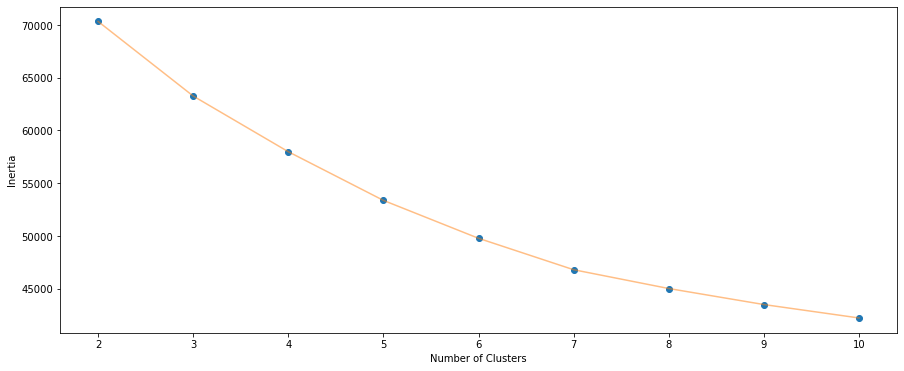

In [381]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [382]:
kmod = KMeans(n_clusters=7, init='k-means++', n_init=10, random_state=123)
segments = kmod.fit_predict(xs)

In [383]:
pca_df['segments'] = segments
df_new['segments'] = segments

C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [384]:
df_new.segments.value_counts()

3    1623
2    1320
0    1175
1     928
4     782
6     298
5      59
Name: segments, dtype: int64

In [385]:
mrg['segments'] = segments

In [386]:
df_new.groupby('segments').mean()

,age_factor,annual_income_factor,emp_status_factor,stud_factor,usage_factor,primary_language_commitment_factor,lang_prof_factor,prim_lang_review_yes,subscriber_factor,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak
segments,,,,,,,,,,,,,,,
0,2.327234,1.938723,2.317872,0.068085,3.976170,2.940851,0.626383,0.0,0.997447,37.094468,159.597021,78.017021,334.320000,313.682128,205.012766
1,1.674569,1.031789,2.364224,0.093211,2.485453,1.644397,0.471983,0.0,0.020474,22.983836,56.681573,15.404095,67.528556,61.298491,9.149246
2,2.185227,1.070076,2.068561,0.075000,3.932955,2.709091,0.728030,0.0,-0.051894,40.461364,165.778409,75.181818,305.707197,287.588258,163.581818
3,2.004005,0.952865,2.347197,0.046519,3.915588,2.605360,0.223352,0.0,0.072397,14.149107,43.373999,28.954713,130.269563,119.261861,19.947320
4,0.659207,0.198210,0.879795,1.884910,3.375320,2.423274,0.544118,0.0,0.056905,20.491049,54.166880,28.425831,117.870844,107.530051,28.545396
5,2.016949,1.245763,2.025424,0.288136,3.601695,2.449153,0.389831,0.0,0.169492,26.305085,93.322034,46.881356,217.389831,206.118644,6000.000000
6,2.424497,1.481544,1.989933,0.083893,3.986577,3.119128,0.704698,0.0,0.543624,43.181208,255.389262,89.632550,1171.333893,1105.496644,237.402685


- Segment 0 are older, with the highest income. They are employed and not students and use the app frequently. They are mostly subscribers.

- Segment 1 are younger but not the youngest. They are employed but have a the lowest usage and are not that committed. They are not subscribers and dont use the app that much.

- Segment 2 are older and lower income and use the app a lot. They are also the most proficient in the language but have a lot of the "I dont know if I am subscribed" option from the survey.

- Segment 3 is similar to segment 2 but not nearly as proficient and also earn a lot less in app items (crowns, lessons, etc).

- Segment 4 are the youngest group. These are the students. Their usage is likely directly tied to a college class.

- Segment 5 are similar to 2 and 3 but also tend to be students to some degree. They are committed and have the longest streaks.

- Segment 6 are the gamers. They subscribe and use the app quite a bit and earn the most in app items. They also tend to be older.

In [387]:
seg_map = {0:'Standard_Subscribers',
           1:'Noncomittal',
           2:'Proficient_Users',
           3:'NonSubscribed_Users',
           4:'Students',
           5:'Very_Committed_Learners',
           6:'App_Gamers'}

### Using PCA

In [395]:
inertia = []
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=123)
#     kmeans = MiniBatchKMeans(n_clusters= i, init='k-means++', random_state=123, batch_size=3072)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(pca_df, kmeans.predict(pca_df), random_state=123)
    print(f"cluster {i}, sil score = {sil_score}")

cluster 2, sil score = 0.24989310992570632
cluster 3, sil score = 0.24105876506309892
cluster 4, sil score = 0.2514803718782192
cluster 5, sil score = 0.23146194009753882
cluster 6, sil score = 0.21477827288235776
cluster 7, sil score = 0.2089962744798344
cluster 8, sil score = 0.19793084335669453
cluster 9, sil score = 0.20096754820933524
cluster 10, sil score = 0.19492553373823188


**The silhouette scores are better here although still not above the 0.5 mark.**

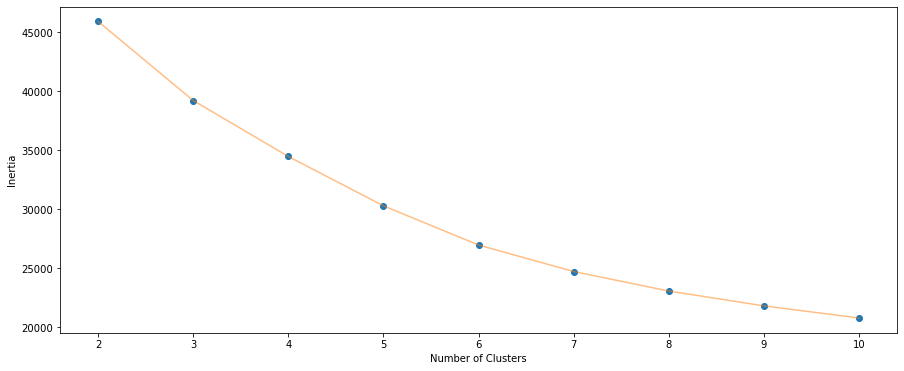

In [396]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Its still around the 3-6 range in segments.**

In [398]:
kmod = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=123)
segments_pca = kmod.fit_predict(pca_df)

In [399]:
df_new['segments_pca'] = segments_pca

C:\Users\bills\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [400]:
df_new.groupby('segments_pca').mean()

,age_factor,annual_income_factor,emp_status_factor,stud_factor,usage_factor,primary_language_commitment_factor,lang_prof_factor,prim_lang_review_yes,subscriber_factor,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,segments
segments_pca,,,,,,,,,,,,,,,,
0,2.289665,1.551451,2.179057,0.076156,3.978921,2.963962,0.730054,0.0,0.510426,41.068223,190.885766,82.671804,470.220988,442.852675,216.257933,1.637353
1,0.687500,0.191304,0.949457,1.684783,3.305978,2.409239,0.569022,0.0,0.042935,21.088587,55.639130,27.151630,114.667935,104.786957,26.865761,3.641304
2,1.993333,1.064167,2.352667,0.040667,3.511167,2.285167,0.333000,0.0,0.093667,20.060667,58.511000,31.261500,122.961333,112.943167,29.656667,2.130333
3,2.016949,1.245763,2.025424,0.288136,3.601695,2.449153,0.389831,0.0,0.169492,26.305085,93.322034,46.881356,217.389831,206.118644,6000.000000,5.000000


**I like this better I think.**

- Segment 0 are older, with the highest income. They are employed and not students and use the app frequently. They are mostly subscribers.

- Segment 1 are students. Studying has the more proficient with the language but they are average in course progress and arent subscribed.

- Segment 2 are older but not the oldest. They are employed and are unlikely to be students however their course progress is similar to that of students.

- Segment 4 are older with decent income and some are students but these tend to be driven by their streak. They are active for long periods of time. SOme are subscribed but they might do a little bit each day.

In [410]:
seg_map2 = {
            0:'Lifelong_Learners',
            1:'Students',
            2:'NonCommital',
            3:'SmallDailyDosers'}

In [411]:
pca_df['segments_pca'] = segments_pca
pca_df['seg_pca_name'] = pca_df.segments_pca.map(seg_map2)

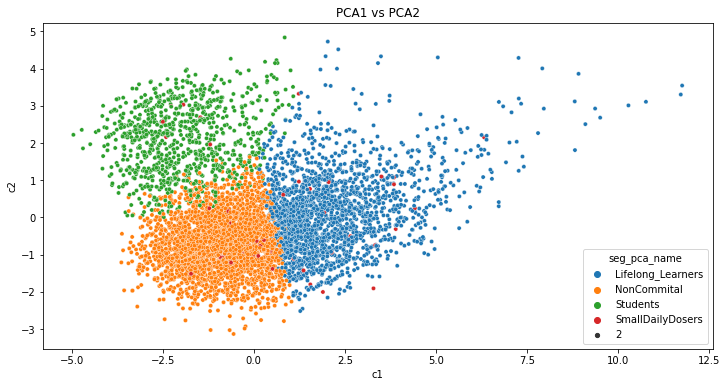

In [460]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(data=pca_df, x='c1', y='c2', hue='seg_pca_name', size=2, ax=ax)
ax.set_title("PCA1 vs PCA2")
plt.savefig('imgs/pca1_pca2.jpg');

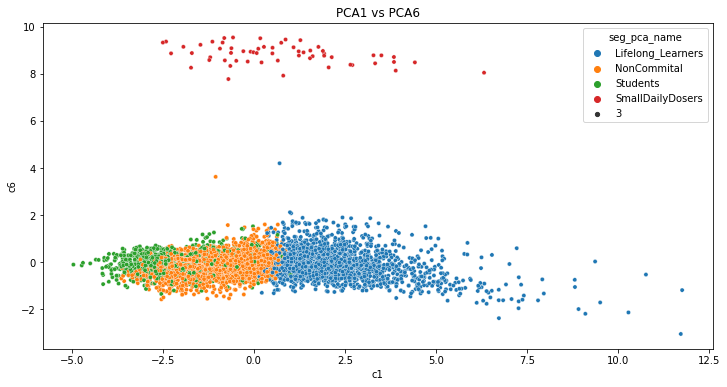

In [461]:
fig, ax=plt.subplots(1,1,figsize=(12,6))
sns.scatterplot(data=pca_df, x='c1', y='c6', hue='seg_pca_name', size=3, ax=ax)
ax.set_title("PCA1 vs PCA6")
plt.savefig('imgs/pca1_pca6.jpg');

- **This longest streak ones may actually be more like outliers in our case here as they are really far above the other for that component.**

- **The splits arent clearly defined but the students are very different from the NonCommitals and Life Long Learners.**

In [420]:
dfg.head()

,daily_goal,highest_course_progress,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,survey_complete,time_spent_seconds,age_factor,annual_income_factor,future_contact_yes,emp_status_factor,platform_is_mobile,stud_factor,prim_lang_review_yes,subscriber_factor,usage_factor,primary_language_commitment_factor,lang_prof_factor,country_weight,plmotiv_weight,app_sd_mon,app_sd_day,app_sd_dow,app_sd_year,gender__Female,gender__Male,gender__NB,country_BR,country_CO,country_DE,country_FR,country_GB,country_JP,country_MX,country_RU,country_TW,country_US,motivation_interest_in_culture,motivation_trip,motivation_review,motivation_like_new_languages,motivation_speak_to_locals,motivation_school,motivation_family,motivation_advancement,motivation_challenge_self,motivation_heritage,motivation_relationships,motivation_brain_health,motivation_productivity,segments
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35c9fc6e72c911e99681dca9049399ef,0.0,58.0,0.0,275.0,91.0,232.0,232.0,589.0,849.0,1.0,193.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,4.0,3.0,2.0,0.144159,0.072878,7.0,8.0,4.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
35c9fdde72c911e98630dca9049399ef,20.0,4.0,0.0,22.0,54.0,90.0,88.0,27.0,125.0,1.0,139.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.144159,0.175004,7.0,2.0,0.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
35c9feb072c911e9ab4cdca9049399ef,0.0,11.0,1.0,17.0,30.0,49.0,47.0,30.0,479.0,1.0,119.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,2.0,0.0,0.144159,0.102445,7.0,13.0,3.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
35c9ff7072c911e9900ddca9049399ef,20.0,11.0,1.0,55.0,93.0,1161.0,1028.0,40.0,117.0,1.0,229.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,-1.0,4.0,3.0,1.0,0.144159,0.114272,7.0,10.0,1.0,2018.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
35ca002672c911e99effdca9049399ef,0.0,64.0,1.0,417.0,85.0,215.0,252.0,266.0,1951.0,1.0,157.0,2.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,4.0,3.0,1.0,0.144159,0.102445,7.0,2.0,1.0,2013.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [424]:
dfg['segments_pca'] = segments_pca
dfg['seg_pca_name'] = dfg.segments_pca.map(seg_map2)

In [442]:
by_gender = []
for item in dfg.seg_pca_name.unique():
    tmp = dfg[dfg.seg_pca_name == item]
    by_gender.append([item, tmp.gender__Female.sum()/len(tmp)*100, 
                      tmp.gender__Male.sum()/len(tmp)*100, 
                      tmp.gender__NB.sum()/len(tmp*100)])
    
by_gender = pd.DataFrame(by_gender, columns=['Segment','Female Count','Male Count', 'NB Count']).set_index('Segment')
by_gender.round(2)

,Female Count,Male Count,NB Count
Segment,,,
Lifelong_Learners,46.99,51.86,0.01
NonCommital,58.35,40.13,0.02
Students,51.68,42.99,0.05
SmallDailyDosers,53.39,46.61,0.00


 - It seems that the non committals and students are more female and the Lifelonglearners more male but not by much.
 - It generally seems to be more female.

In [444]:
by_gender.sum(axis=1)

Segment
Lifelong_Learners     98.855621
NonCommital           98.498500
Students              94.727174
SmallDailyDosers     100.000000
dtype: float64

**Captured most instances.**

In [445]:
by_country = []
for item in dfg.seg_pca_name.unique():
    tmp = dfg[dfg.seg_pca_name == item]
    by_country.append([item, tmp.country_BR.sum()/len(tmp)*100, 
                       tmp.country_CO.sum()/len(tmp)*100,
                       tmp.country_DE.sum()/len(tmp)*100,
                       tmp.country_FR.sum()/len(tmp)*100,
                       tmp.country_GB.sum()/len(tmp)*100,
                       tmp.country_JP.sum()/len(tmp)*100,
                       tmp.country_MX.sum()/len(tmp)*100,
                       tmp.country_RU.sum()/len(tmp)*100,
                       tmp.country_TW.sum()/len(tmp)*100,
                       tmp.country_US.sum()/len(tmp)*100])

by_country = pd.DataFrame(by_country, columns=['Segment','BR','CO','DE','FR',
                                               'GB','JP','MX','RU','TW','US']).set_index('Segment')
by_country.round(2)

,BR,CO,DE,FR,GB,JP,MX,RU,TW,US
Segment,,,,,,,,,,
Lifelong_Learners,2.79,3.81,7.52,22.64,5.10,19.15,18.52,15.34,2.77,2.36
NonCommital,8.18,5.30,12.17,13.82,15.02,11.10,11.87,8.30,4.80,9.45
Students,6.79,7.28,9.18,12.01,9.02,14.13,12.66,9.67,7.01,12.23
SmallDailyDosers,5.08,4.24,8.47,15.25,15.25,13.56,10.17,6.78,8.47,12.71


In [446]:
by_country.sum(axis=1)

Segment
Lifelong_Learners    100.0
NonCommital          100.0
Students             100.0
SmallDailyDosers     100.0
dtype: float64

In [450]:
survey_info = dfg.groupby('seg_pca_name')[['time_spent_seconds']].agg(['count','min','mean','median','max'])
survey_info

time_spent_seconds                                     
                               count    min         mean median       max
seg_pca_name                                                             
Lifelong_Learners               2206   17.0  2784.711695  346.0  436130.0
NonCommital                     3000    2.0  3544.305500  325.0  435350.0
SmallDailyDosers                  59  104.0   600.000000  358.0    8146.0
Students                         920   68.0  4138.626087  299.5  584939.0

- **Students had the highest average survey time but the lowest median.**
- **The survey consisted mostly of Lifelong Leaners and NonCommital.**

In [456]:
survey_info = dfg.groupby('seg_pca_name')[['survey_complete']].agg(['count','mean'])
survey_info

survey_complete          
                            count      mean
seg_pca_name                               
Lifelong_Learners            2206  0.960109
NonCommital                  3000  0.887833
SmallDailyDosers               59  0.966102
Students                      920  0.967391

**It seems most people completed the survey regardless of Segment.**